In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

In [92]:
# Loadinf the data set using panda library "pd.read_''"
# Write variable dataframe as df. This is Panda Library notation
df = pd.read_json("../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [93]:
# Checking the dataset for NaN values 
#".sum" adds the true/false values together throughtout the data set. 0 is False and 1 is True
df.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [94]:
#Choose colum 'article link' to remove. 
del df['article_link'] # Deleting this column as it is of no use

In [95]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


'shows how many article are sarcastic or not. \nGenerally it compartmentalizes the categories of the data \nand presents the number data points within each category in the form of a bar graph'

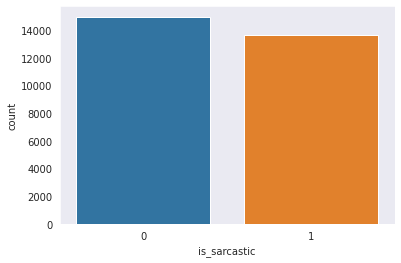

In [96]:
# A visualization library. It doesn't apply any mathametical operations, however it presents the data 
sns.set_style("dark") #setting the style of the graphical information
sns.countplot(df.is_sarcastic) 
"""shows how many article are sarcastic or not. 
Generally it compartmentalizes the categories of the data 
and presents the number data points within each category in the form of a bar graph"""
#this could be a good way to check if the data is balanced or unbiased

In [97]:
#Similar to a sentiment analysis, we can remove certain words that do not provide further context
#From the nltk library, we use nltk.corpus import stopwords (a list of words in English that can be ignored)
stop = set(stopwords.words('english')) #defining the variable of 'stop' as a set of stopwords. The set doesn't repeat its elements
punctuation = list(string.punctuation) #Ignore the punctuations as well for this case. Not always the case.
stop.update(punctuation) #updating the set with nonrepeating elements of punctuation marks

In [98]:
#View the full set in stop. This may be a line to revise in order to improve accuracy in the future
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [99]:
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#This is preprocessing the data and preparing it for the NN. 
#'text' is a local variable that doesn't exist...yet

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    text = re.sub('\[[^]]*\]', '', text) #This commands the first index to be substituded with the second
# Removing URL's
    return re.sub(r'http\S+', '', text) #'r' is used when you are reading a path; '+' implies the path continues, and remove all of it
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split(): #i can be anything, it is a local variable and only exists inside this function
        #it changes the sentence into list of words. Breaking it down into small chunks
        if i.strip().lower() not in stop: #if there are words not listed in 'stopwords' set, add them to final list
            final_text.append(i.strip())
    return " ".join(final_text)#" ".join creates a space in between each element inside of the list
#Removing the noisy text
def denoise_text(text): #3 steps of refining
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['headline']=df['headline'].apply(denoise_text)

In [100]:
df['headline'][0].split()[3].strip()

'doomsday'

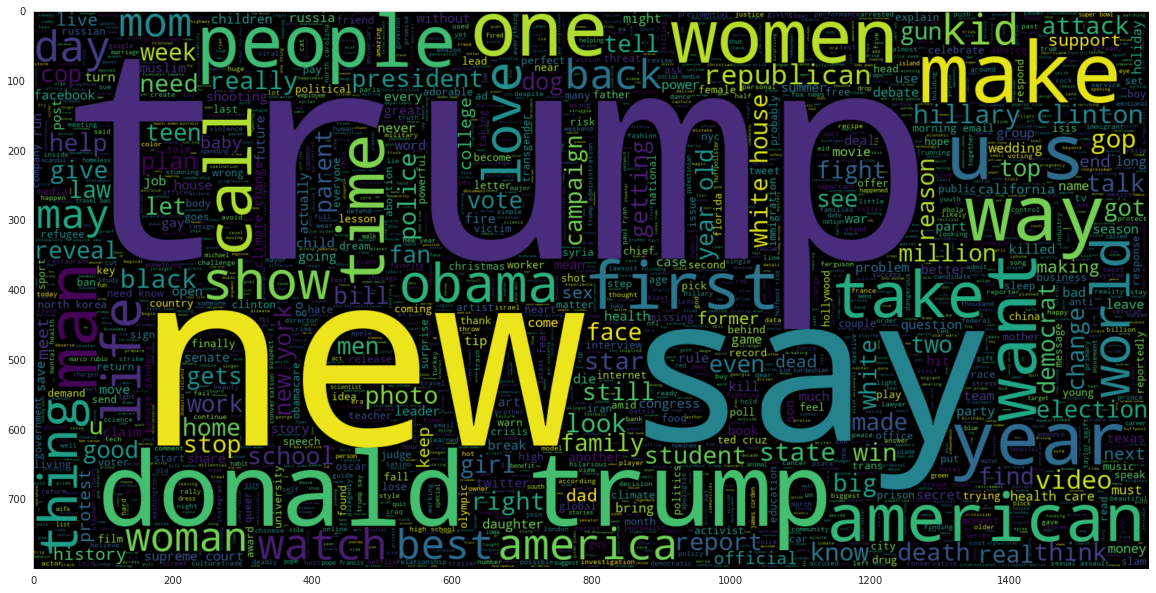

In [101]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline))
"""A boolean list (True/Fales) of values 
that is defined as 'not sarcastic' inside of the headline column"""
plt.imshow(wc , interpolation = 'bilinear')#dictates the position of nonsarcastic words in the word cloud

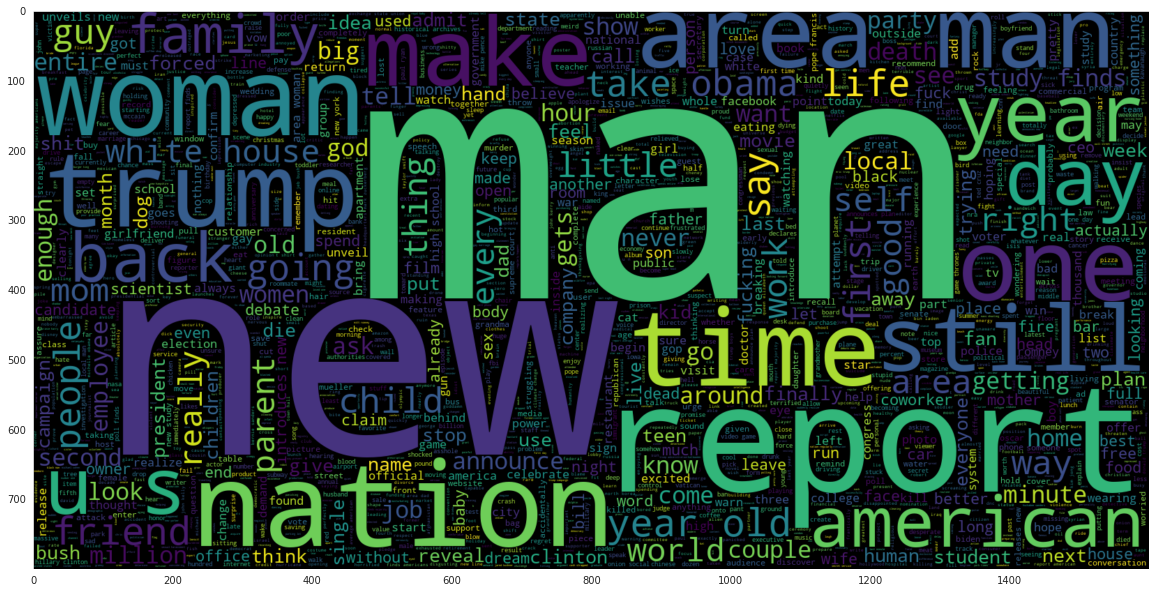

In [102]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear') #same as above, but using words that ARE considered sarcastic

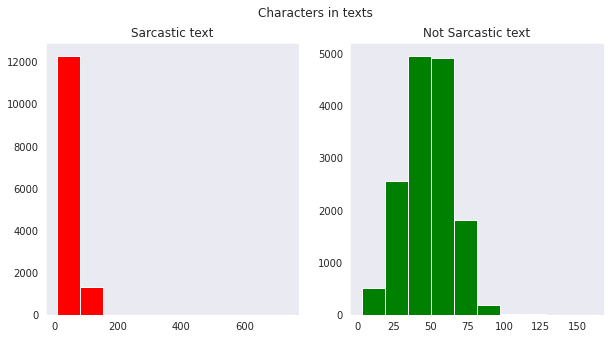

In [103]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Characters in texts') #title of the entire graph
plt.show()

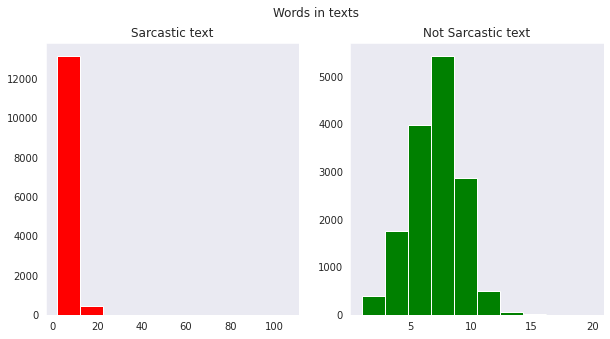

In [104]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.split().map(lambda x: len(x)) 
"""this generates a local function that produces the number of words in the list of decomposed 
sarcastic headlines"""
ax1.hist(text_len,color='red')# this creates a histogram whose length equals the 
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Words in texts')
plt.show()

In [154]:
len(df[df['is_sarcastic']== 0]) #Number of Non Sarcastic articles in the dataset

14985

In [155]:
len(df[df['is_sarcastic']==1]) #Number of Sarcastic articles in the dataset. Difference is about 1300

13634

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

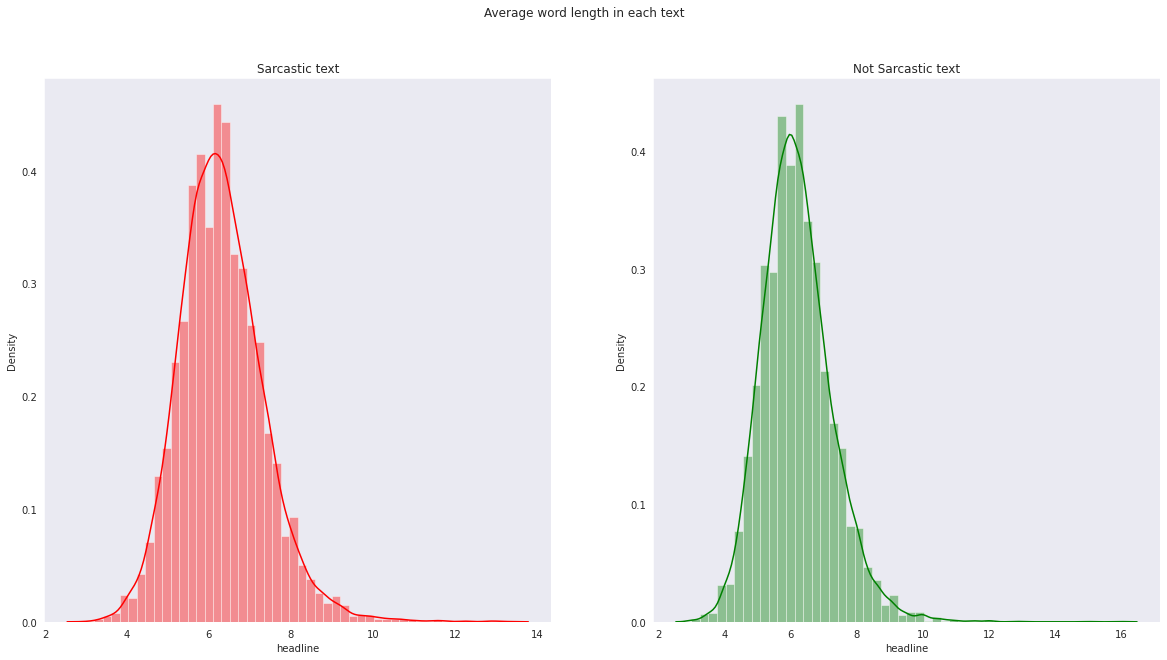

In [105]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10)) #one figure, two graphs with rectangular sizing
word=df[df['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x])
"""word is a variable that takes words in sarcastic headlines, counts the number of characters in each 
word and creates a list of numbers representing the amount of characters for each word in each headline """
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red') 
"""distribution plot to showcase the mean of character distribution per word in the headline"""
ax1.set_title('Sarcastic text')
word=df[df['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Average word length in each text')

**Converting text to format acceptable by gensim**: Gensim (Generate Similar) is an open-source library for unsupervised topic modeling and natural language processing, using modern statistical machine learning to create mathematical relationships between words of a similar nature.

In [106]:
words = [] #empty list that contain a series of segmented headlines as words.
for i in df.headline.values: 
    """df.headline creates a list of headlines in the entire data frame while
    df.headline.values places each headline into an array"""
    words.append(i.split())#restructures the array of headlines into a list of words 
words[:5] 
"""An array of the first five headlines reconstructed into a list of their words"""
print(words[:5])

[['thirtysomething', 'scientists', 'unveil', 'doomsday', 'clock', 'hair', 'loss'], ['dem', 'rep.', 'totally', 'nails', 'congress', 'falling', 'short', 'gender,', 'racial', 'equality'], ['eat', 'veggies:', '9', 'deliciously', 'different', 'recipes'], ['inclement', 'weather', 'prevents', 'liar', 'getting', 'work'], ['mother', 'comes', 'pretty', 'close', 'using', 'word', "'streaming'", 'correctly']]


In [107]:
import gensim #import the library to create relationships between words with similar meaning
from gensim.models import Word2Vec

#Dimension of vectors we are generating
EMBEDDING_DIM = 200 #This does not effect the length of vocab or alpha size. The dimension seems abitrarily chosen

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences = words, vector_size=EMBEDDING_DIM , window = 5 , min_count = 1)
"""size was converted to vector_size dict in the update of the gensim library. dict size 
no longer works and returns TypeError: __init__() got an unexpected keyword argument 'size'"""
print(w2v_model)

Word2Vec(vocab=38065, vector_size=200, alpha=0.025)


In [108]:
#vocab size
len(w2v_model.wv.key_to_index)
"""vocab dict was updated to key_to_index with the new gensim library as well. After running the command
it appears there is a 6 word discrepency between the original notebook and this one"""

#We have now represented each of 38071 (now 38065!) words by a 100dim (shouldn't this be 200dim?) vector.
print(len(w2v_model.wv.key_to_index))

38065


In [109]:
"""Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords,
phrases, symbols and other elements called tokens. In the process of tokenization, some characters 
like punctuation marks are discarded. The tokens become the input for another process like parsing 
and text mining"""
tokenizer = text.Tokenizer(num_words=35000)
"""the maximum number of words to keep, based on word frequency. Only the most common
num_words-1 words will be kept"""
tokenizer.fit_on_texts(words)
"""Updates internal vocabulary based on a list of texts.
In the case where texts contains lists, we assume each entry of the lists to be a token."""
tokenized_train = tokenizer.texts_to_sequences(words) 
"""Maps the words in the segmented lists to a unique number"""
x = sequence.pad_sequences(tokenized_train, maxlen = 20)
"""This pads each sequence of words_to_unique_numbers to the same length. Now they are all of the same 
size and can be easily manipulated."""
print(x)

[[    0     0     0 ...  2336   558   944]
 [    0     0     0 ... 11455  1990  1810]
 [    0     0     0 ... 16794   480  1357]
 ...
 [    0     0     0 ...   957   671  1654]
 [    0     0     0 ...  3001   825  5968]
 [    0     0     0 ...  2970   171    88]]


In [110]:
#Review text_to_sequence and padding results to ensure you know what's happening
print(words[0])
print(tokenized_train[0])
print(x[0])
print(words[2])
print(tokenized_train[2])
print(x[2])
# Notice how x[0] and x[2] are the same size, despite having different lengths of words.
# Notice how each word is mapped to a unique number in the list

['thirtysomething', 'scientists', 'unveil', 'doomsday', 'clock', 'hair', 'loss']
[16792, 231, 2832, 7173, 2336, 558, 944]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0 16792   231  2832  7173  2336   558   944]
['eat', 'veggies:', '9', 'deliciously', 'different', 'recipes']
[782, 16793, 545, 16794, 480, 1357]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0   782 16793   545 16794   480  1357]


In [111]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size increases by 1
vocab_size = len(tokenizer.word_index) + 1
vocab_size

38066

In [112]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word] #This is the format for the dictionary
    return weight_matrix # this is a local variable that only exists in this function

In [113]:
print(get_weight_matrix)
print(vocab_size)

<function get_weight_matrix at 0x7f5a94f6a290>
38066


In [114]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model.wv.key_to_index, tokenizer.word_index)

In [115]:
w2v_model

In [116]:
"""This is dictionary that maps evry word to a unique number"""
w2v_model.wv.key_to_index

{'new': 0,
 'man': 1,
 'trump': 2,
 'one': 3,
 'area': 4,
 'woman': 5,
 'says': 6,
 'donald': 7,
 'report:': 8,
 'u.s.': 9,
 'day': 10,
 'like': 11,
 'get': 12,
 'first': 13,
 'time': 14,
 "trump's": 15,
 'people': 16,
 'still': 17,
 'house': 18,
 'white': 19,
 'make': 20,
 'life': 21,
 'obama': 22,
 'back': 23,
 'women': 24,
 'could': 25,
 'clinton': 26,
 'americans': 27,
 'way': 28,
 'world': 29,
 'family': 30,
 'would': 31,
 'finds': 32,
 'gop': 33,
 'bill': 34,
 'really': 35,
 'black': 36,
 'years': 37,
 '5': 38,
 "can't": 39,
 'police': 40,
 'school': 41,
 'best': 42,
 'nation': 43,
 'know': 44,
 'going': 45,
 'every': 46,
 'last': 47,
 'american': 48,
 'death': 49,
 "'the": 50,
 'say': 51,
 'campaign': 52,
 'state': 53,
 'home': 54,
 'getting': 55,
 'health': 56,
 'things': 57,
 'president': 58,
 'good': 59,
 'mom': 60,
 'may': 61,
 'show': 62,
 'big': 63,
 'gets': 64,
 'hillary': 65,
 'year': 66,
 'need': 67,
 'little': 68,
 'take': 69,
 'video': 70,
 'work': 71,
 'parents': 72,

In [117]:
embedding_vectors

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       ...,
       [2.7274e+04, 2.7274e+04, 2.7274e+04, ..., 2.7274e+04, 2.7274e+04,
        2.7274e+04],
       [3.3875e+04, 3.3875e+04, 3.3875e+04, ..., 3.3875e+04, 3.3875e+04,
        3.3875e+04],
       [2.1862e+04, 2.1862e+04, 2.1862e+04, ..., 2.1862e+04, 2.1862e+04,
        2.1862e+04]])

# Training WORD2VEC Model

In [118]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [119]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 200)           7613200   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 20, 256)           336896    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                55680     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 8,005,841
Trainable params: 8,005,841
Non-trainable params: 0
_________________________________________________________________


In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, df.is_sarcastic , test_size = 0.3 , random_state = 0) 

In [121]:
history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)

Epoch 1/3
157/157 [==============================] - 54s 288ms/step - loss: 0.7081 - acc: 0.5470 - val_loss: 0.6817 - val_acc: 0.5719
Epoch 2/3
157/157 [==============================] - 43s 275ms/step - loss: 0.6698 - acc: 0.5862 - val_loss: 0.6681 - val_acc: 0.5714
Epoch 3/3
157/157 [==============================] - 44s 279ms/step - loss: 0.6561 - acc: 0.6100 - val_loss: 0.6537 - val_acc: 0.6123


In [122]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

627/627 [==============================] - 9s 14ms/step - loss: 0.6559 - acc: 0.6090
Accuracy of the model on Training Data is -  60.90450882911682
269/269 [==============================] - 4s 14ms/step - loss: 0.6537 - acc: 0.6123
Accuracy of the model on Testing Data is -  61.227577924728394


# Analysis After Training of Word2Vec Model

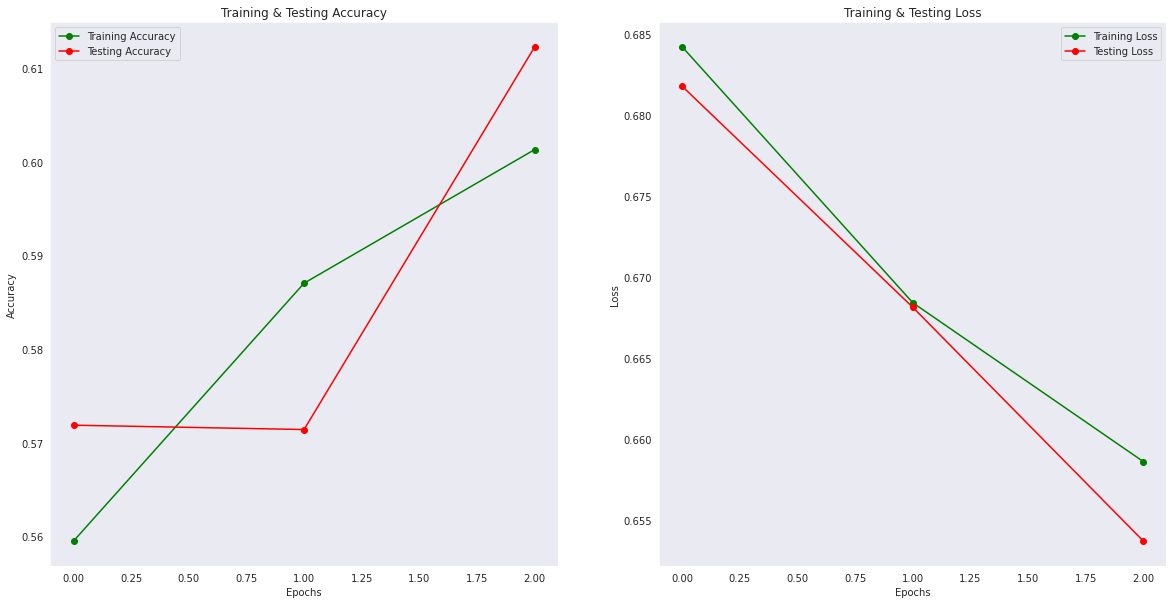

In [123]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

**Possible Overfitting Occurring in the Model**

In [124]:
pred = model.predict_classes(x_test)
pred[:5]

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [1],
       [0],
       [1]], dtype=int32)

In [125]:
cm = confusion_matrix(y_test,pred) # Shows which classes are predicted incorrectly
cm

array([[4003,  557],
       [2772, 1254]])

<AxesSubplot:>

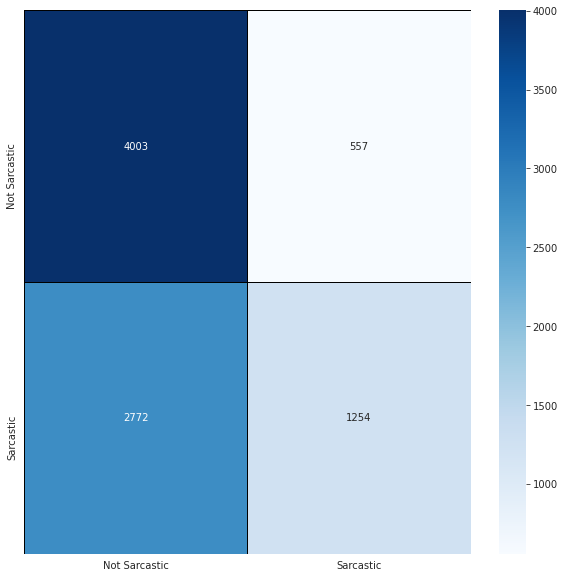

In [126]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])
#The cm below comparmtnetalizes predicted values and real values in four quadrants. The diagonals of those 
#quadrants represent data that was calssified correctly. The X-axis represents real values, while Y is predicted


# Introduction to GloVe [EDIT]
**GloVe method is built on an important idea, You can derive semantic relationships between words from the co-occurrence matrix. Given a corpus having V words, the co-occurrence matrix X will be a V x V matrix, where the i th row and j th column of X, X_ij denotes how many times word i has co-occurred with word j. An example co-occurrence matrix might look as follows.**
![image.png](attachment:image.png)
**The co-occurrence matrix for the sentence “the cat sat on the mat” with a window size of 1. As you probably noticed it is a symmetric matrix. How do we get a metric that measures semantic similarity between words from this? For that, you will need three words at a time. Let me concretely lay down this statement.**

In [138]:
x_train,x_test,y_train,y_test = train_test_split(df.headline,df.is_sarcastic, test_size = 0.3 , random_state = 0)

In [139]:
max_features = 35000
maxlen = 200

**Tokenizing Text -> Repsesenting each word by a number**

**Mapping of orginal word to number is preserved in word_index property of tokenizer**

**Tokenized applies basic processing like changing it to lower case, explicitely setting that as False**

**Lets keep all news to 200, add padding to news with less than 200 words and truncating long ones**

In [140]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [141]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [148]:
EMBEDDING_FILE = '../input/glovetwitter27b100dtxt/glove.twitter.27B.200d.txt'

<user> 0.31553 0.53765 0.10177 0.032553 0.003798 0.015364 -0.20344 0.33294 -0.20886 0.10061 0.30976 0.50015 0.32018 0.13537 0.0087039 0.1911 0.24668 -0.060752 -0.43623 0.019302 0.59972 0.13444 0.012801 -0.54052 0.27387 -1.182 -0.27677 0.11279 0.46596 -0.090685 0.24253 0.15654 -0.23618 0.57694 0.17563 -0.01969 0.018295 0.37569 -0.41984 0.22613 -0.20438 -0.076249 0.40356 0.61582 -0.10064 0.23318 0.22808 0.34576 -0.14627 -0.1988 0.033232 -0.84885 -0.25684 0.26369 0.29562 0.1847 -0.20668 -0.013297 0.12233 -0.47751 -0.17202 -0.14577 0.047446 -0.15824 0.054215 -0.19426 -0.081484 0.099009 0.10159 0.043571 0.50245 0.13362 0.065985 0.032969 -0.2017 -0.56905 -0.13203 0.073347 -0.063728 -0.2796 -0.38481 -0.020193 0.22298 -0.059115 0.045198 -0.13995 -0.13299 0.47309 -0.021874 0.38758 -0.074926 -0.0028093 -0.29829 -0.074987 -0.58542 -0.18065 -0.041805 0.41938 0.41004 -0.5911 0.10459 0.10724 0.69768 -0.15901 -0.059596 0.29368 -0.19609 0.39124 -0.29333 -0.0050833 -0.37854 0.33858 0.24782 0.29144 -0.22833 0.19421 -0.055409 0.10322 0.38963 -0.27813 0.21963 0.40014 0.071036 -0.079786 0.19534 -0.69432 -0.093075 -0.13729 -0.54014 0.57165 0.24443 0.036741 0.033606 -0.14398 0.25873 0.089008 0.11109 0.38387 0.19013 -0.23252 -0.26271 -0.26936 -0.32409 0.55236 -0.46158 -0.11086 -0.38417 0.59605 -0.14479 -0.28762 -0.29638 0.21889 -4.1257 0.69382 -0.26307 -0.013691 0.032916 0.017627 -0.02909 0.42807 -0.20815 0.50598 -0.080836 0.45083 -0.11466 -0.27782 -0.038373 0.15672 -0.010899 0.082053 -0.19766 0.20574 -0.075329 0.083754 -0.72767 0.10403 0.42831 0.41023 -0.097314 0.15128 0.39287 -0.17807 -0.029196 0.57502 -0.17823 -0.76488 -0.47383 -0.21984 0.2119 -0.015729 -0.062927 0.26674 -0.23617 0.18109 -0.26583 0.090904 -0.81205 -0.45664 -0.4654 0.52066
. 0.35132 0.00056084 -0.21488 -0.04707 -0.17777 0.66162 -0.0074805 -0.15963 -0.22129 0.65523 0.346 -0.22968 -0.078954 0.27465 0.36018 0.20373 -0.048134 0.091749 -0.093562 -0.088653 -0.61514 -0.1124 -0.21046 0.13129 0.11224 -0.92995 -0.18006 0.0096874 0.93647 -0.19493 -0.13873 0.18719 -0.022502 0.39516 0.33007 0.36089 0.0078608 -0.024064 -0.3289 -0.28101 -0.20223 0.30049 -0.22843 0.0639 0.59025 -0.17992 0.72733 0.028216 -0.43656 -0.06433 0.087363 0.0054825 0.34902 0.081738 0.35089 0.053459 0.05537 0.10797 0.19663 0.63077 -0.074041 0.13848 0.24849 -0.10183 0.42992 -0.41886 0.010814 -0.48654 0.19154 -0.18615 0.17851 0.4053 0.14635 0.22446 0.12614 -0.45649 -0.16633 0.15915 -0.12543 -0.055649 -0.30481 0.12712 -0.015809 -0.062656 0.87436 0.4834 -0.16578 0.39106 0.11319 -0.1763 0.01411 -0.40942 0.32281 -0.22064 0.022058 0.076171 0.13255 -0.067011 0.45695 0.04404 0.076988 -0.1565 0.35628 0.18131 -0.040064 0.56617 -0.37482 -0.36297 -0.18098 0.026808 -0.16885 0.24951 -0.14548 -0.23878 -0.074018 -0.032295 0.16866 0.33322 0.023116 -0.4722 0.27615 0.25764 -0.14382 -0.3359 0.029436 -0.15695 -0.084597 -0.10684 -0.24784 0.021849 -0.14485 -0.12874 -0.17975 -0.20351 -0.085811 0.31607 0.28477 -0.011954 0.1486 -0.15402 0.36125 -0.082339 0.27478 0.056358 -0.21401 0.74459 0.048518 0.06175 0.17656 -0.075019 -0.61491 0.063787 -3.9376 0.54504 0.15964 -0.41187 0.51993 0.1342 -0.031554 -0.26429 0.040603 0.2661 0.082515 -0.090602 0.0057244 0.40602 -0.30109 0.37078 0.11716 -0.26164 -0.38366 -0.13616 -0.30152 -0.17193 0.14108 0.31278 0.16425 0.17671 -0.29942 0.43029 0.057682 -0.1411 -0.031367 0.058953 -0.3055 -0.88512 -0.47983 -0.056183 -0.10459 0.039792 -0.4437 0.14186 -0.42475 0.023551 -0.096965 0.079513 -1.4683 0.036684 -0.037206 0.85384
: 0.80767 0.49786 0.082696 -0.0079298 0.082471 -0.5936 -0.18753 0.48645 0.10719 -0.31299 0.17609 0.046026 0.036029 0.47656 -0.1215 -0.098428 -0.18983 0.038915 -0.20902 -0.316 0.5007 -0.22646 0.12353 -0.27012 0.70739 -0.98348 -0.54111 0.32431 -0.19345 -0.18299 -0.45738 -0.44089 -0.47504 -0.090636 0.085478 0.028124 -0.28045 0.21273 0.0060152 -0.37948 -0.68825 -0.59779 -0.046953 0.65887 0.44564 -0.25169 -0.030223 0.25673 -0.293 -0.047083 -0.43578 -0.45254 -0.15416 0.35722 0.48247 0.42448 -0.32445 -0.27119 0.31039 -0.40884 -0.4227 0.080102 0.28311 0.013829 0.94008 -0.58542 0.34853 -0.15336 0.1654 0.093904 0.46697 0.11781 0.091151 -0.41349 -0.19446 -0.58665 0.094378 0.14077 0.35482 -0.17125 -0.050602 0.21653 -0.11619 0.45904 -0.30238 0.072354 -0.46345 1.3963 -0.21264 -0.25539 -0.31002 -0.27831 -0.40129 0.10612 -0.42636 0.035816 0.20376 0.22088 0.47981 -0.0767 0.3361 0.34746 0.088655 0.65177 0.45665 0.091346 -0.53175 0.14724 -0.4377 0.27911 -0.67202 0.38052 -0.011494 -0.11314 -0.29098 0.43887 -0.004587 0.079091 -0.0045291 -0.63007 0.1432 0.1942 -0.076888 -0.21021 0.25376 -0.47742 0.14886 0.2257 -0.40912 0.18141 -0.19515 -0.3797 -0.3215 0.0075749 0.68672 0.06226 0.0010575 0.30921 0.10123 -0.28578 0.20308 -0.13243 -0.8974 0.70887 -0.04753 0.54342 -0.40847 0.14928 0.23341 0.024772 0.30833 -0.14153 -3.6293 0.40686 0.22129 -0.2993 -0.01763 0.045388 -0.03538 -0.14189 -0.098312 0.083338 -0.20842 0.59749 0.039259 -0.046968 -0.038719 0.04147 0.40501 -0.13983 -0.40245 0.30089 -0.03762 0.12831 -0.15879 0.17023 0.75995 0.3549 0.0046914 -0.053001 0.13518 0.40568 -0.22714 -0.063414 -0.36388 -0.4503 -0.47098 -0.0973 0.77199 -0.01085 -0.15552 0.11186 0.068971 -0.55048 -0.5001 0.1886 -0.85631 -0.073302 -0.47785 0.67059
rt 0.55687 0.63284 -0.15609 0.26397 0.28015 -0.36506 -0.12128 0.45217 -0.16123 0.015791 0.49511 0.054643 0.66865 0.44101 -0.48446 0.12594 0.40596 -0.086889 -0.2352 -0.0073657 0.58835 -0.12101 -0.11671 -0.47415 0.47753 -1.3069 -0.42765 -0.0055401 0.2247 0.061141 0.010707 0.20652 -0.48375 0.40042 0.35776 0.17049 -0.23819 0.28888 -0.069899 0.094793 -0.33917 -0.11422 0.016834 0.53581 0.25739 -0.2775 0.056731 0.34448 -0.10715 -0.21423 0.020693 -0.59172 -0.39452 -0.1925 0.20454 0.40205 -0.096825 -0.037272 0.32491 -0.26628 0.0072484 0.19783 0.17485 -0.071738 0.084738 -0.43062 0.016838 0.14359 -0.13822 0.27964 0.31179 0.33653 0.12314 -0.15906 -0.62741 -0.83838 -0.069363 0.28698 -0.11668 -0.43706 -0.063269 -0.19582 0.42072 0.19197 0.057278 0.32468 -0.59688 0.82594 -0.7103 0.47354 0.11517 -0.11188 -0.53444 0.015748 -0.57038 -0.1253 -0.45733 0.42662 0.41064 -0.27635 -0.2032 0.14295 0.46532 0.16804 0.022694 -0.24602 0.059308 0.73777 -0.29451 -0.33315 -0.29938 0.33871 0.37681 0.31939 -0.014027 0.32298 0.054817 0.13213 0.3252 -0.6153 -0.12941 0.28465 0.32881 0.25362 0.27244 -0.82169 0.41908 -0.62524 -1.2176 0.27902 -0.33003 -0.20213 -0.28881 -0.071473 0.23549 0.38409 0.13101 0.17312 0.018403 -0.29669 0.17959 -0.33733 -0.82358 0.1042 -0.51619 0.035018 -0.19027 0.50867 0.023113 -0.53112 0.10043 0.27881 -4.2515 0.44271 0.29931 -0.23305 0.011018 0.07118 0.14536 0.2012 -0.046338 0.36196 -0.33985 0.65517 -0.045043 -0.39308 0.22788 0.30343 -0.058125 0.18367 -0.22463 -0.46903 -0.20435 -0.13256 -0.73335 -0.42302 0.14038 0.59022 -0.28843 -0.09194 0.18957 0.039595 -0.11694 0.67706 -0.23313 -0.079736 -0.46375 -0.054137 0.0557 -0.12069 -0.30669 -0.15438 -0.19857 0.064394 -0.14346 -0.10524 -0.57253 0.23857 -0.79235 0.23761
, 0.3927 -0.084181 -0.6075 0.3231 -0.35919 0.62664 0.29758 -0.21039 -0.23201 0.11897 0.41827 -0.21206 -0.036036 0.39526 0.53432 -0.33607 -0.23529 0.027524 -0.21025 -0.49712 0.12486 -0.14865 -0.45697 0.35445 -0.31083 -1.8664 -0.32149 -0.41014 0.35596 0.25467 -0.35302 0.059504 0.1571 0.61731 -0.13229 0.18362 0.1329 -0.13754 -0.068064 -0.29138 -0.53293 -0.048187 -0.1334 0.11968 -0.045649 -0.42278 0.69403 0.30971 -0.66289 0.017076 -0.45864 -0.23924 0.24663 0.13362 -0.34587 0.031223 -0.43579 0.16547 -0.25115 0.48124 -0.21432 0.22534 0.20446 -0.45843 0.60826 0.20866 -0.46438 -0.34758 0.088277 -0.30944 0.41937 0.12139 -0.46349 0.08518 -0.070756 -0.84094 -0.32331 -0.53684 0.28473 0.22625 0.092721 0.039561 -0.48258 0.069858 0.49982 0.54392 -0.34694 0.72118 -0.30233 -0.049354 -0.47386 -0.26428 0.27401 0.1476 0.091779 0.10067 0.15366 -0.65149 -0.085811 -0.22351 0.28081 0.046785 0.42656 0.12003 0.13375 -0.035338 0.0067347 -0.36015 -0.70746 -0.033635 -0.11495 0.45643 0.11071 -0.18302 -0.335 -0.13371 -0.32718 0.28352 0.19098 -0.53333 0.49566 -0.18797 -0.1495 -0.027403 -0.0051272 -1.2365 0.049948 -0.0711 -0.74201 -0.13454 -0.35839 -0.20315 -0.20721 -0.10175 -0.13152 0.089342 -0.13269 0.36283 0.03283 -0.36339 -0.0097338 -0.20782 -0.17021 0.44278 -0.29718 0.76858 0.29221 0.21189 0.39831 -0.12685 -0.49607 -0.21184 -4.3586 -0.0046878 -0.01809 -0.13526 -0.44054 -0.496 0.11789 -1.0292 0.17799 -0.021813 0.2141 -0.27944 0.024458 0.28278 -0.49199 0.49358 0.34139 -0.67217 -0.44666 -0.46249 -0.56888 -0.71003 -0.39095 0.2495 0.46399 0.15134 -0.5881 -0.1399 -0.11789 0.17936 -0.22037 -0.27648 0.16274 -1.1748 -0.99164 0.13503 0.016681 -0.45423 -0.61859 -0.32079 -0.25119 0.27893 0.25774 -0.46615 -0.48912 0.093868 -0.58506 0.19544
<repeat> 0.48365 0.074092 0.035808 0.1837 -0.0055507 0.4946 0.19134 0.03439 0.124 0.497 0.22026 0.14875 -0.087489 0.2007 0.27677 0.14395 0.085068 -0.29692 -0.31205 -0.28611 -0.2853 -0.21406 -0.0015875 0.28379 0.45808 -0.96406 -0.23448 0.0091893 0.87533 -0.2023 -0.32477 0.11698 -0.049919 0.66395 0.084736 0.39125 0.18271 -0.035318 -0.57579 -0.20551 -0.23062 0.35881 -0.27569 -0.079905 0.44818 -0.22134 0.73625 0.11705 -0.29931 -0.080987 0.063264 0.019367 0.53439 0.047894 0.51155 -0.099004 0.24383 -0.040301 0.32858 0.52553 -0.511 0.064888 0.00035338 -0.16928 0.16035 -0.49109 -0.28445 -0.25447 0.087041 -0.11167 0.30871 0.22714 0.27496 0.40992 0.083541 -0.23053 -0.07561 0.4044 -0.24236 -0.06673 -0.1361 0.23941 0.0046563 -0.30201 0.68632 0.50158 -0.090542 0.19751 0.10782 -0.21801 -0.007615 -0.55442 0.13983 -0.19564 -0.2843 0.321 0.12356 0.049433 0.48659 -0.092405 0.16451 -0.29006 0.2574 0.29196 -0.068686 0.84368 -0.20974 -0.30622 -0.039201 0.086584 -0.18344 0.19745 -0.1058 0.024573 0.10797 0.16249 0.05995 0.28058 0.35063 -0.35246 0.29341 0.053807 -0.30814 -0.27155 0.025861 -0.12151 0.16498 -0.27282 -0.39701 0.13343 -0.013141 -0.23271 -0.37496 -0.19441 -0.19597 0.21651 0.17255 -0.11353 0.056583 -0.23815 0.26516 -0.035565 -0.0037845 0.15816 0.029007 0.56548 0.069491 0.33281 0.092466 -0.42289 -0.59447 -3.1346e-05 -3.6112 0.31168 0.25546 -0.36377 0.50472 0.19558 0.11716 -0.00013422 -0.09889 0.23556 0.22412 0.19927 0.040472 0.42248 -0.12453 0.2008 0.016718 -0.063665 -0.16599 0.063122 -0.15367 -0.013236 0.21194 0.29234 0.17497 0.58967 -0.31983 0.55151 0.057295 -0.23766 0.064864 0.31454 -0.34666 -1.0399 -0.25091 -0.035868 0.032614 0.16876 -0.19663 0.050388 -0.47558 -0.23434 -0.11046 0.14824 -1.4968 -0.26657 -0.16971 1.0579
<hashtag> -0.053786 -0.81562 0.30279 -0.82658 -0.089303 0.44406 0.22077 -0.19696 -0.12741 0.77625 -0.074079 -0.19726 0.45642 -0.18463 -0.28701 0.20814 -0.6127 -0.23801 0.067228 0.93303 0.22468 0.40971 -0.28637 -0.6361 0.09467 -0.48264 -0.397 0.34223 0.71971 0.057944 -1.0315 -0.39339 -0.70731 0.37576 1.2443 -0.071228 0.75629 0.19416 -0.31115 0.25839 -0.68982 0.29239 -0.0091509 -0.44959 0.83376 0.19054 -0.13173 -0.1612 -0.47195 -0.40294 0.44459 -0.66282 -0.4004 0.21208 0.31924 0.21033 0.45335 -0.11985 -0.50656 -0.39169 -0.18608 -0.4333 -0.28037 -0.066203 -0.10867 -0.56017 0.56865 0.54745 0.10254 0.54653 -0.23824 -0.33899 -0.3429 0.16921 -0.046941 0.80585 -0.88302 -0.19138 0.61336 -0.20328 0.83677 0.1983 0.98554 -0.17746 -0.52427 0.69006 -0.24219 0.70572 -0.26733 0.41968 0.095768 -0.4204 0.34683 0.036668 0.13645 -0.39407 -0.83038 0.63529 1.3961 0.15793 0.43179 -0.61287 -0.1787 -0.3063 0.82991 0.97254 -0.048146 0.39579 -0.069044 -0.065898 -0.2771 0.12512 0.3324 0.12587 0.71882 0.11638 0.095395 -1.0675 -0.3727 1.1062 0.38365 -0.076677 0.27466 -0.031379 -0.58118 -0.22442 0.099066 0.56311 0.0076699 0.63894 -0.08471 0.6222 0.31384 -0.25679 0.023794 -0.3497 0.42453 0.063466 0.10383 -0.38838 0.08097 0.067405 -0.24857 -0.28558 -0.25887 -0.48538 -0.33009 1.1235 -1.0039 0.28284 -0.32673 -0.53735 -4.1033 -0.08971 0.90894 0.45068 0.1897 0.18893 0.21736 -0.12913 -0.36624 -1.2491 -0.35695 -0.2557 -0.16652 -0.12617 0.23906 -0.0046627 -0.315 0.043288 0.16462 -0.19985 1.2068 0.3862 0.016954 0.30485 -0.2285 -0.36451 -0.39109 -0.020771 1.2822 -0.20702 0.00097104 0.6501 -0.059492 -0.026119 0.21461 -0.9194 -0.093084 -0.20608 -0.48404 -0.42344 -0.026859 -0.013458 -0.65501 0.027362 -0.71635 -1.1717 -0.34901 1.4034
<number> 0.34141 -0.034142 0.1643 -0.11149 0.14907 0.52641 -0.55042 0.35677 0.07617 0.48959 0.10042 0.01123 -0.024007 0.45353 -0.61272 -0.36067 0.081092 0.053523 -0.50394 -0.2924 -0.57961 -0.10894 0.32228 -0.66214 0.76865 -0.9176 -0.40324 -0.40874 0.47189 0.45127 -0.74173 -0.25656 -0.030706 0.42865 0.11332 0.30713 -0.59145 -0.17659 -0.27424 -0.3074 -1.5549 -0.031463 -0.45362 0.21363 0.060165 -0.93882 -0.10469 -0.95571 0.025844 -0.3598 -0.99932 -0.64337 -0.075182 0.39789 0.39114 0.60404 -0.23148 -0.25137 0.12141 0.55073 0.10099 -0.81369 -0.26309 -0.47742 -0.29244 0.22078 0.13067 -0.56455 0.28965 -0.50702 0.19507 0.0098538 -0.0023272 0.16265 -0.16735 -0.55663 -1.0588 0.012142 0.075441 -0.36721 0.90286 0.13488 -0.33865 0.10883 0.81018 0.29158 -0.39147 0.79622 -0.17528 0.43568 -0.012246 0.07894 -0.48057 -0.11744 0.30691 -0.24033 0.30442 -0.51716 0.45696 0.23968 0.0068775 -0.28115 0.57049 1.0944 0.453 -0.10036 0.13762 0.15225 0.3615 0.21353 0.21592 0.068226 -0.13299 -0.47216 0.57087 0.23083 -0.35173 0.1751 -0.19685 0.098858 -0.51604 -0.11148 -0.10986 -0.27537 -0.030136 -0.12766 0.44728 0.85526 -0.65846 0.72309 -0.23411 -0.14079 0.93215 -0.030494 0.65349 -0.57638 -0.34464 -0.42594 -0.24862 0.1401 0.46219 -0.9207 -0.50109 0.3281 0.41702 -0.50236 0.27027 -0.63144 -0.11099 0.27019 -0.63941 0.20188 -4.2272 0.44045 0.20809 0.088974 -0.019732 -0.13116 -0.088394 -0.42187 0.24461 0.13886 0.48632 0.10033 -0.35938 -0.27594 0.5856 -0.11657 0.50369 -0.044761 0.059573 -0.16305 -0.1633 0.38559 -0.36545 0.68706 -0.40516 0.34901 0.8118 0.7 0.19117 0.35478 -0.52714 -0.84407 -0.18233 -0.042864 0.033879 0.059233 -0.067753 -0.03866 0.33991 -0.2061 -0.36821 0.073563 -0.8125 0.34531 -0.55762 0.31483 0.042309 1.2084
<url> -0.10483 -0.27061 0.19552 -0.51262 -0.33362 -0.59809 -0.50222 0.00018046 -0.12967 0.83806 0.2226 0.55495 -0.097522 0.047931 0.045791 0.012577 0.040474 -0.23788 -0.35736 -0.1796 -0.44095 -0.53325 -0.53426 -0.26675 -0.28628 -0.41906 -0.62745 0.47378 0.39932 -0.25862 -0.54502 -0.71764 -0.69877 0.22001 0.18183 0.0078231 0.23888 -0.077968 -0.30478 -0.45362 -1.0905 0.51416 -0.49506 0.54126 0.70686 0.11762 0.064455 -0.14118 -0.67587 -0.48449 0.41741 -0.91895 0.0052789 0.1133 0.41352 -0.18269 0.56544 0.32018 0.03541 0.44451 0.16487 -0.71205 0.26248 0.58389 0.082305 -0.21965 0.090574 0.059265 0.50489 -0.25031 0.53316 -0.39281 0.22106 -0.12177 -0.22153 -0.3738 -0.99535 0.11548 -0.12571 -0.51402 0.68823 0.49763 0.28394 -0.011511 0.6434 -0.59577 -0.16618 0.67135 -0.063257 0.001545 0.076843 -0.86684 -0.32556 -0.305 0.060604 -0.18094 0.018658 0.35301 0.67056 -0.28209 0.16607 0.1036 0.064896 0.6327 0.62413 1.2124 -0.24265 0.28108 0.46713 0.033273 -0.13513 0.48056 0.094202 0.5639 0.1776 0.89932 0.4321 -0.37581 -0.25902 1.0168 0.45978 0.5887 0.18254 0.04211 -0.13879 -0.75739 0.19308 0.42281 0.22341 0.47347 -0.041399 0.8355 -0.23559 -0.1374 0.89335 -0.72199 0.30895 0.39847 0.11686 -0.62992 0.18238 0.2769 0.004814 -0.072102 -0.10325 0.023653 -0.46615 0.11151 -0.38711 0.11197 -0.25243 0.11145 -4.0466 -0.004798 0.33443 0.32954 0.060214 0.14645 -0.11546 0.12838 -0.53486 -0.07204 0.22911 -0.084443 -0.022666 -0.26492 0.1074 -0.016927 -0.3676 0.36305 0.10998 0.1165 0.41191 -0.077197 0.45205 1.4014 0.90275 -0.016178 0.11219 -0.13489 0.56895 -0.0058629 0.35574 0.40306 0.10562 -0.38776 -0.15713 -0.48667 0.15116 -0.22843 -0.058285 -0.26354 -0.14112 -0.44069 -0.22458 0.10514 -0.39618 -0.51996 -0.89641 1.309
! 0.55447 -0.14265 -0.0037743 -0.31723 -0.3841 0.4017 0.55058 0.19051 0.28973 0.23726 0.13833 0.61631 0.51043 0.28116 -0.045438 0.40447 0.014801 -0.60133 -0.43153 -0.56208 0.24276 -0.06861 0.16479 0.60137 0.58872 -0.86677 0.15443 -0.034078 1.0268 -0.22881 -0.68152 -0.030318 -0.54917 0.44752 0.25673 0.40809 0.31148 -0.079602 -0.98425 -0.29327 0.2936 -0.036235 -0.079949 -0.17329 -0.19125 -0.25834 0.12239 0.44798 -0.12136 0.41039 -0.19374 -0.21915 0.52912 -0.24238 0.52407 0.19486 0.21674 0.030905 0.14611 0.56553 -0.28881 0.041428 -0.29593 0.12824 -0.04656 -0.36826 -0.50823 -0.19008 -0.13716 -0.11434 0.2688 -0.016488 0.22033 0.65944 0.031066 -0.46776 -0.087796 -0.035348 0.2066 0.40642 -0.064782 0.71074 0.015694 -0.56598 0.85974 0.49284 -0.22092 0.15942 0.08275 -0.16714 -0.00090104 -0.89732 -0.17058 -0.45966 -0.3021 0.30128 0.40493 0.17397 0.21229 -0.49421 -0.24326 -0.52407 0.31761 0.23678 -0.039536 0.57122 -0.60154 -0.088704 -0.25458 0.32501 -0.66386 0.24215 0.029193 0.12868 0.50289 0.5858 -0.056271 2.2197e-06 0.27018 0.47234 0.52854 -0.45502 -0.1999 0.38237 -0.32694 -0.62655 -0.041975 -0.38303 -0.34358 0.16271 -0.026935 -0.12662 -0.22014 -0.14994 0.15782 0.015528 -0.26299 -0.065713 0.19209 0.10728 -0.23748 -0.19003 -0.32032 0.608 -0.068984 0.18475 0.14027 0.26534 0.089163 0.20321 -0.55114 0.2353 -4.1166 0.032206 0.24149 -0.74903 -0.19132 0.29823 -0.38917 0.3497 -0.35258 -0.075522 -0.16247 0.23801 0.080375 0.2321 0.12394 0.45236 -0.23008 0.65086 -0.35855 -0.24387 -0.044017 -0.040992 0.40619 -0.066195 0.34952 0.37299 -0.32405 0.35736 0.18622 -0.38873 -0.093462 0.49478 0.13383 -0.93154 -0.45526 -0.29013 -0.087815 -0.16559 0.041454 0.1494 -0.26271 -0.56818 -0.30467 0.20848 -1.2226 -0.2828 -0.069286 1.2271
i 0.056404 0.49536 0.18439 0.054535 -0.51751 0.13517 -0.028431 -0.28941 -0.36937 0.13805 -0.40432 -0.38688 -0.92374 0.084847 -0.025726 0.074009 -0.15078 0.017502 -0.26418 0.070203 0.060806 0.057828 0.53376 -0.45798 -0.34893 0.41734 -0.14478 0.051219 0.60852 -0.14347 -1.0784 0.15326 -0.62126 -0.10352 -0.17531 0.3202 -0.065742 0.28368 -0.093065 0.42999 0.036164 -0.043594 0.64534 -0.030429 -0.06962 0.46912 0.41154 0.10764 -0.41528 -0.37646 0.0042483 -0.0038518 -0.54801 0.4268 0.1213 -0.13655 -0.12625 -0.077671 -0.048875 0.18646 -0.20102 0.16072 -0.24878 -0.03254 0.089225 0.23424 -0.14706 0.17401 -0.2005 -0.52814 -0.060838 -0.38587 -0.10137 -0.75314 -0.10833 -0.22126 -0.25788 0.08868 -0.44524 -0.48773 0.34806 0.72463 -0.54181 0.014614 -0.03025 -0.50486 -0.38994 -0.41185 0.40449 -0.13938 0.36416 0.32814 0.2876 0.036742 -0.54919 0.0026954 -0.66878 -0.14724 0.58611 0.1944 -0.28183 0.30247 -0.28516 0.21857 0.04519 -0.021381 -0.1782 -0.26819 -0.17461 -0.090044 -0.56435 0.016128 0.46715 -0.13784 0.30693 -0.1195 0.048228 -0.38087 0.13975 -0.1778 -0.16895 -0.41903 -0.28014 0.085721 0.1591 0.16362 0.049473 0.24218 -0.2872 0.052732 0.099733 0.18526 -0.39043 0.016129 -0.32187 -0.60063 0.34471 0.071991 0.35411 -0.26071 0.24218 0.13291 -0.13186 0.49163 -0.03107 0.5214 0.33929 -0.021473 0.37887 -0.31674 0.02276 0.67114 -6.5906 1.0882 0.41578 0.35602 -0.43386 0.036837 -0.94779 0.076451 0.20441 -0.39052 -0.27733 -0.13655 -0.30801 0.15603 0.34511 0.37337 -0.39022 0.036027 -0.29752 0.46819 0.039796 -0.20419 0.12409 0.22593 0.21817 0.044821 -0.13675 -0.35873 0.16696 0.22434 0.015491 0.27953 0.70375 -0.14428 0.47438 0.17737 -0.20384 -0.23397 -0.47247 -0.23687 -0.10937 -0.23436 -0.75368 0.27098 -0.20515 0.63598 -0.1888 -0.035558
a 0.14931 0.27889 0.089979 0.40882 -0.21328 0.15406 -0.025642 -0.64515 -0.71643 -0.11794 -0.296 -0.43363 -0.21885 0.032778 0.15606 0.022966 -0.053795 0.33622 -0.62113 0.10144 0.23716 -0.051758 0.291 -0.4331 0.51603 -1.9666 0.20311 0.066447 0.15362 0.64771 -0.38559 0.0047402 -0.052268 -0.10286 0.0067909 0.51034 -0.19149 -0.10676 -0.93639 0.23279 -0.68884 0.046741 0.10391 0.17044 0.5332 -0.16093 0.098364 0.36096 0.076576 0.40381 -0.02151 0.064061 -0.32644 -0.1555 -0.014447 0.55337 0.25903 0.10481 0.31606 0.21116 0.30245 -0.18877 -0.53178 0.022984 0.77533 -0.17901 -0.14461 0.079017 -0.61084 -0.32571 -0.24362 -0.14472 0.173 -0.48226 0.079645 -0.17424 -0.20305 0.087496 0.084781 0.19527 0.3927 0.16613 -0.31525 -0.079715 0.17212 0.45553 -0.011114 -0.1195 -0.39213 0.49166 0.56016 0.24092 0.015597 0.33681 0.4724 0.17707 -0.17481 -0.26716 -0.24148 -0.65067 0.6383 0.37816 -0.90254 -0.42457 0.0067957 -0.0035392 -0.38539 -0.13497 -0.26438 -0.091551 0.45779 0.20661 0.31355 -0.29931 -0.20429 0.091683 -0.1402 0.51077 0.10712 0.49198 -0.5616 0.054185 0.58032 -0.16596 -0.38643 -0.097051 0.58707 0.14964 0.27113 -0.12814 -0.034048 0.092901 0.23331 -0.27932 -0.4001 -0.0034193 -0.3925 0.049183 -0.4358 -0.064382 0.37906 -0.054632 -0.67676 0.35143 0.65238 0.21358 0.35812 0.15221 -0.25112 -0.13765 0.09199 -0.0013461 -6.0206 0.22602 -0.2528 -0.19129 0.31382 0.44607 0.3663 0.075894 0.093947 -0.15956 0.39989 0.63161 0.29423 -0.77584 -0.23667 -0.20197 0.017155 -0.38523 0.66689 0.089704 -0.31599 0.50257 0.51956 0.069124 0.17671 -0.057517 0.75929 0.033151 -0.26773 0.14788 0.12935 0.2002 0.39306 0.18141 0.09388 -0.37701 0.074141 0.25046 0.12651 0.46811 0.49654 -0.18688 0.57106 -0.40908 -0.040246 -0.44821 0.31604 -0.49365
" 0.27503 0.39964 0.068553 -0.0070507 -0.28359 0.030789 0.15136 1.0904 0.24242 0.028929 0.25914 0.207 -0.71731 0.27167 0.10684 0.010744 0.17237 -0.23477 0.38641 -0.068472 0.065835 -0.0082194 -0.45431 -0.1542 0.42099 -1.1672 -0.033936 0.1168 0.4788 -0.21392 0.17187 0.22629 -0.44216 0.22408 0.24786 0.68181 -0.30005 -0.22329 -0.19711 0.33255 -0.89373 -0.35143 0.096382 0.26648 0.26832 -0.41272 0.10271 0.6538 0.092108 -0.096449 0.3394 0.33815 0.011984 0.080963 0.33466 0.090252 -0.23951 -0.44423 -0.096799 0.071532 -0.070856 0.054377 0.1305 0.14541 0.70912 -1.0547 -0.17133 -0.036129 0.28063 -0.027733 0.12515 -0.0054312 -0.045829 -0.33576 -0.33169 -0.66479 0.069377 -0.14642 0.46049 0.38306 -0.68719 0.51231 -0.14794 0.19097 -0.15327 0.18475 -0.8806 1.1318 -0.14473 -0.052842 -0.037086 -0.28542 -0.29191 -0.60169 -0.21548 0.11647 -0.13425 -0.31026 0.96926 -0.0036229 0.34134 0.19026 0.83171 -0.029881 0.36703 0.61744 -0.33973 0.038335 -0.73432 0.62418 -0.022951 0.15016 0.26177 -0.44681 -0.68298 0.004371 -0.22168 0.3903 0.20109 -0.084867 0.11629 0.27217 -0.58571 -0.104 0.26892 0.10941 0.24365 -0.011534 -0.83984 -0.59503 0.37027 0.26322 -0.07764 0.0222 0.22262 0.78037 -0.01362 0.96978 0.19554 -0.27084 0.15002 -0.0035762 -0.29496 0.069161 0.060029 0.28145 -0.31451 -0.16228 0.50256 0.064819 -0.096659 0.098803 -3.7494 0.15464 0.07385 -0.3802 0.15221 0.048765 0.039879 -0.025037 0.12097 0.15096 -0.21689 0.041509 -0.096364 0.08827 0.12669 0.16042 0.29716 -0.26821 -0.25938 -0.32828 -0.12417 0.10745 -0.14591 0.52322 0.34537 -0.053978 -0.52943 0.16897 0.12719 0.40601 -0.74205 0.062245 -0.080681 -0.65866 -0.14801 -0.53054 0.22896 0.27068 -0.0042021 -0.13498 -0.2398 0.11619 -0.36803 0.07144 -0.94283 -0.25653 -0.19767 0.32214
the 0.4935 0.35698 0.66068 -0.032975 0.24989 0.25936 -0.027169 0.068403 -0.29063 -0.45705 -0.07794 0.32516 -1.4852 -0.067472 -0.17033 -0.0092964 0.34628 -0.011575 0.037965 0.45617 0.080486 0.1531 -0.15309 -0.1881 -0.18195 0.87245 0.39792 0.40995 0.44982 -0.0019651 -0.041124 -0.047867 -0.24045 -0.086883 0.01418 -0.2376 0.25183 0.28551 0.44504 -0.49644 -0.12709 -0.17476 0.082196 0.045409 0.5172 0.034546 -0.085822 -0.34924 0.52215 -0.3951 0.064123 -0.4202 -0.15943 0.18283 -0.057885 -0.019182 -0.44547 0.31542 -0.16096 -0.092139 -0.2496 -0.0013897 -0.42643 -0.17932 0.081654 0.18324 -0.32065 -0.00012009 -0.13095 -0.29812 -0.0025144 -0.11318 -0.46378 -0.1996 0.851 -0.068009 0.1287 -0.67256 -0.012225 0.14201 0.92478 0.085156 0.26888 0.3039 -0.1403 0.18599 -0.25526 0.18381 -0.35222 -0.078399 -0.26944 -0.18083 -0.027305 -0.39332 0.24542 -0.11199 0.12093 -0.46106 0.0037773 0.23799 -0.19402 0.15473 -0.00099502 0.092256 0.3985 -0.38062 -0.36498 0.0049292 -0.073963 0.14034 -0.23085 0.13001 0.30408 0.1059 0.078896 0.086252 0.058663 0.17926 -0.151 0.9524 0.37305 0.022537 0.032819 -0.49961 0.16748 0.3039 0.33058 -0.47308 0.56388 0.57122 0.055669 -0.29073 -0.17466 -0.13091 0.15409 -0.2146 0.31676 0.20931 0.011919 -0.34405 0.1199 0.39104 -0.41181 0.2084 0.19732 0.40073 0.41617 0.072766 -0.33984 0.20382 0.086184 0.28313 -6.7626 -0.56832 0.14953 -0.24673 0.60453 0.12149 -0.52715 0.13591 0.15676 0.058968 -0.32974 0.021303 0.001275 0.24996 -0.024638 0.25518 0.38581 -0.24223 -0.18271 0.2961 0.21855 0.19233 0.15229 -0.013649 -0.050622 -0.096446 0.015646 0.51167 0.14723 -0.081492 -0.31069 -0.11167 -0.13433 0.3667 -0.29659 -0.49952 -0.060474 0.0046954 -0.16617 -0.17018 0.11233 0.1604 -0.17142 -0.15621 -0.11366 0.17706 -0.53695 -0.29699
? 0.3621 0.08462 -0.24355 -0.2859 0.21116 0.27018 -0.36877 0.34605 0.27327 0.19336 0.32812 -0.10264 -0.087297 0.16158 0.4834 0.094305 0.27365 -0.49282 -0.72417 0.39405 0.059394 -0.27405 -0.26656 0.20805 -0.081239 -1.7357 0.081419 -0.29323 0.35571 -0.3406 0.56733 1.1054 -0.067576 -0.16579 0.24526 -0.11908 0.54053 0.11882 -0.80788 -0.18306 -0.39205 0.061614 -0.85463 0.399 0.32663 -0.2622 -0.090546 -0.0066867 -0.17811 -0.31683 0.40356 0.088493 0.24232 -0.016769 0.020154 0.4343 0.12704 0.91632 0.25875 0.07503 -0.39887 0.17612 0.093923 -0.43125 0.34595 0.28692 0.087963 -0.18592 0.58112 -0.020545 0.54661 0.865 0.17666 -0.058776 -0.15785 -1.0102 -0.63893 0.85962 -0.35946 0.25122 -0.25206 0.27551 0.087947 0.059199 0.55926 -0.10975 -0.70223 -0.55777 -0.58461 0.67177 -0.27261 -0.51663 -0.14007 0.26135 -0.066852 0.31771 0.23646 0.35854 0.42999 0.17578 0.37498 -0.45687 0.2458 0.42506 -0.17108 -0.17917 -0.35611 0.51068 0.17694 -0.15642 0.0093888 -0.045566 -0.35085 -0.057678 -0.27993 0.41671 0.3658 0.52946 0.14261 -0.20589 -0.038088 -0.21086 -0.21381 -0.33619 -0.098212 -0.98354 -0.010759 -0.41736 -1.1293 -0.66823 0.021948 -0.19349 0.37869 -0.1944 -0.26225 0.16574 0.1696 0.60516 0.43698 -0.24487 0.20893 -0.28342 0.13896 0.2298 -0.19358 0.69475 -0.16659 -0.074954 0.29617 -0.43182 -0.23047 0.052543 -4.8959 0.022439 0.15493 -0.19173 -0.28304 -0.3971 -0.19366 0.29398 0.18866 -0.15386 0.29499 0.12267 0.15686 0.093346 0.27047 0.37595 -0.17277 -0.20911 0.045158 -0.20153 -0.30882 -0.16425 -0.92471 -0.055976 0.11924 -0.31764 -0.32933 0.2326 -0.91879 0.29081 -0.031765 -0.044809 -0.29079 -0.84241 -0.45502 -0.28308 -0.038346 0.35736 0.27134 0.064279 -0.25121 -0.16794 -0.17868 0.050141 0.012413 -0.65129 -0.73917 0.52779
you 0.1964 0.67153 0.0062976 0.25359 -0.42097 0.3849 1.0378 -0.18536 -0.054244 -0.10856 0.12146 0.047692 -0.93228 -0.27192 -0.3506 0.11069 -0.055099 -0.079658 0.011767 0.14395 -0.025917 -0.18253 0.025691 0.19619 0.10334 1.0731 0.41992 0.17083 0.91596 -0.43398 0.16464 0.012715 0.095477 0.1449 -0.29652 -0.10642 0.098389 0.17937 0.23289 -0.22209 0.08777 -0.18005 0.38678 -0.032059 0.1202 -0.41741 0.26827 -0.19769 0.021976 -0.23585 0.14789 0.10173 -0.1038 -0.31954 0.63308 -0.051142 -0.053209 0.29378 -0.054395 4.3346e-05 0.25585 -0.18048 -0.2703 0.0077783 0.63585 0.14869 -0.10854 -0.24726 -0.10869 -0.24147 0.28059 0.13645 -0.03561 -0.68258 0.11957 0.011085 -0.013771 -0.17603 -0.57826 -0.041571 -0.12342 0.58091 -0.044446 0.14833 -0.081576 -0.15804 -0.43868 -0.090296 -0.27891 -0.032887 0.11688 0.054837 0.10082 0.24519 0.15062 0.038064 -0.25851 -0.23446 0.064198 0.12255 -0.52537 0.3335 -0.23323 -0.2578 0.29035 0.13483 0.065876 0.38322 0.11237 -0.0023038 -0.28184 0.17724 0.56759 0.24386 -0.040227 -0.045024 -0.34185 -0.41455 -0.04111 0.22438 -0.11626 0.20744 -0.11859 -0.077585 0.33058 -0.28058 0.049034 -0.19482 0.067283 0.03007 0.069742 -0.13861 0.62041 0.38005 -0.050533 0.097378 0.27874 -0.17388 0.37021 -0.66593 0.14769 -0.063142 -0.12092 0.37639 -0.20316 0.36495 0.25422 0.16774 0.050256 0.054627 0.10653 -0.070859 -6.7986 0.40561 -0.38071 0.32075 -0.33545 -0.015599 -0.46192 0.2986 0.51756 -0.17136 -0.83454 -0.14496 -0.36553 -0.18636 0.10103 0.36616 0.1311 0.51864 -0.41521 -0.1965 -0.006874 -0.014722 -0.33198 0.13165 0.29492 -0.19796 -0.28374 -0.14532 0.19547 0.11138 0.12032 0.21849 0.47585 -0.78959 0.3075 0.010715 -0.21146 -0.020619 -0.11518 0.55363 -0.185 -0.19653 0.10566 -0.26214 0.20397 -0.30815 -0.12312 0.048926
to 0.61774 0.21046 0.52698 0.20467 0.257 -0.21732 0.61374 -0.010005 0.30721 -0.10223 0.27075 -0.3691 -1.4433 -0.11167 -0.011774 -0.61509 -0.047574 0.29608 -0.5399 -0.66852 -0.10916 -0.17703 -0.45429 0.17385 0.29253 0.16115 0.19399 0.44625 0.87495 -0.092465 0.013727 -0.1858 -0.33876 -0.4523 -0.43748 0.010453 0.40842 0.13613 -0.78784 0.099471 0.088163 0.66798 0.34415 -0.39527 0.23724 0.15362 -0.49449 -0.056937 -0.1427 -0.069449 -0.30868 -0.076233 0.20988 0.078556 -0.56155 0.1809 -0.51773 0.46357 0.30987 -0.019069 0.67242 0.39125 -0.14125 0.011573 0.12692 0.088414 -0.30354 0.32022 -0.75043 0.64759 0.40745 -0.32315 0.1308 0.11403 0.22156 0.13545 0.30976 -0.35066 0.26475 -0.18838 0.20806 0.24032 0.43735 0.34629 0.21611 0.35571 -0.023089 0.34014 -0.0097253 -0.38114 0.072125 0.031611 0.37476 0.18813 0.67863 -0.39233 -0.075472 -0.13099 -0.38893 0.01188 0.41337 -0.10998 0.30033 -0.046344 0.22431 -0.63357 0.4211 0.061615 -0.087939 -0.10441 -0.14026 0.066755 0.47358 0.16719 0.10758 -0.22153 0.048319 0.42274 0.23313 0.36964 0.33876 0.41347 -0.11237 0.15725 0.73065 -0.0049247 0.27203 0.30763 0.4704 0.26032 -0.095454 -0.76075 0.53049 0.090797 -0.4706 -0.2985 0.2864 0.57581 0.058647 -0.8291 0.15576 0.022733 -0.045719 0.70358 0.34692 0.060275 0.18755 0.83105 0.065844 0.28287 0.52738 0.26252 -6.6675 0.64621 0.0075547 0.78997 -0.52943 -0.24546 0.63916 0.25545 -0.0292 0.19652 0.041215 0.15697 -0.41102 -0.24685 0.19674 -0.015722 -0.064124 -0.26484 -0.13809 0.17366 0.027951 -0.037426 -0.18403 -0.29065 0.070043 -0.3512 0.26538 -0.032504 0.2406 0.79199 -0.12442 0.035116 -0.413 0.086633 0.40075 0.0087781 0.29536 0.28309 0.1547 -0.18914 0.20568 -0.18938 0.033298 0.022822 0.33207 -0.011269 -0.52165 0.093783
( 0.16762 -0.21179 0.058315 0.47727 -0.15969 0.3449 0.54477 0.66641 -1.0233 -0.035409 0.01144 0.17114 -0.49152 -0.016049 0.2921 -0.45877 0.010507 0.012066 -0.20729 -0.029156 0.20239 -0.32054 0.51624 -0.27496 1.1771 -1.3263 0.33897 -0.022441 0.71761 0.042866 -0.13031 -0.22414 -1.1455 0.023997 0.90106 0.40108 -0.46228 -0.33216 0.21619 0.60194 -0.99425 -0.20979 -0.31341 0.56767 0.15098 -0.61864 -0.15827 -0.68349 0.019944 -0.55746 -0.87661 -0.63549 -0.10772 0.52538 0.087341 0.35087 -0.23886 0.016036 0.36735 0.88674 -0.47748 -0.2354 -0.31555 -0.18908 -0.14525 -0.87312 -0.66559 -0.17754 0.10732 -0.028596 0.18558 -0.24364 0.08536 -0.14391 0.09177 -1.2148 -0.40726 0.30799 -0.65502 -1.066 -0.094626 0.19289 0.60991 0.1855 0.31413 -0.47971 -0.075054 1.8784 0.54378 -0.091766 -0.12397 -0.25312 0.14073 -0.62655 -0.10055 0.098852 -0.18107 -0.46959 0.68095 -0.26057 0.65333 0.39879 0.80503 -0.07917 0.55013 -0.27765 0.023707 -0.12365 -0.26887 0.48866 -0.18847 -0.4264 -0.26773 0.17007 0.26641 0.97488 -0.5195 -0.84534 -0.35505 0.053599 0.14783 0.19915 -0.82381 0.42034 -0.50853 -0.26294 0.024889 0.0017021 -0.79965 0.26565 0.097284 -0.2065 -0.017566 0.30966 0.32717 0.13072 -0.016553 0.20204 -0.058871 -0.086963 -0.021312 -0.11781 -0.082645 -0.66274 -0.23897 0.65422 -0.37295 -0.27157 0.32932 -0.027749 -0.77822 0.33636 -3.3931 0.17917 -0.034407 0.17797 0.15851 0.076586 -0.13281 -0.27458 -0.61545 0.66277 0.37577 -0.098383 0.25838 0.33541 -0.13733 0.63796 0.1849 -0.58954 -0.21523 -0.16952 0.13439 0.19129 -0.56308 0.38145 0.44822 0.58267 0.1754 -0.54446 -0.25562 -0.19554 0.93664 0.46254 0.29159 -0.25935 0.36142 -0.15322 0.27643 -0.26821 -0.058393 0.14794 -0.565 -0.55371 -0.33641 0.3054 -0.99494 -0.22364 -0.56797 -0.05791
<allcaps> 0.88085 0.27314 -0.23069 -0.18326 -0.035762 0.095322 0.33204 0.28469 -0.15264 0.87403 0.53841 0.15379 0.38382 -0.11431 -0.19711 -0.42781 -0.66469 0.10045 -0.11643 0.4372 0.32208 0.11022 -0.00093362 -0.5559 0.874 -0.71907 0.021134 0.19763 0.54199 0.099856 -0.86971 -0.72827 -1.2309 0.75845 1.141 -0.038561 0.5734 -0.41542 0.047679 0.315 -0.78922 -0.0028608 0.35104 -0.13065 0.71292 -0.32654 -0.14115 -0.33844 -0.37834 -0.94167 -0.24976 -0.4629 -0.22095 0.53706 0.61093 0.42766 0.35149 0.12226 -0.17845 0.31843 -0.48456 -0.86563 -0.45217 0.097255 -0.77431 -0.4841 -0.05762 -0.0047106 0.085283 0.5379 0.49444 0.12583 0.18401 0.017576 0.082875 -0.37452 -0.63781 0.1615 0.0375 -0.6582 0.7525 0.035662 0.63433 0.29423 0.18021 0.79831 -0.72084 2.2008 -0.33193 0.1116 -0.32109 0.10478 -0.019394 -0.046687 -0.10629 -0.65253 0.34628 0.29639 0.71062 -0.66985 0.70461 -0.27699 0.48388 0.23772 0.76432 0.81202 -0.10774 -0.20738 0.79951 -0.23705 -0.19962 0.18055 0.054913 0.2785 0.36781 0.83873 -0.079585 -1.0012 -0.33295 1.3392 0.01441 -0.42658 -0.63637 0.59076 -0.53534 -0.37628 0.37162 0.31004 -0.9185 0.36441 0.42827 -0.091473 0.10477 -0.003837 0.5347 -0.18369 0.12516 0.74816 0.32187 -0.72394 -0.50237 0.056767 -0.21241 -0.57788 0.069225 -0.28413 -0.32762 0.016193 -0.40873 -0.12811 -0.41224 -0.53676 -3.1593 -0.18418 0.71056 0.44551 0.49587 0.39984 -0.25392 -0.12954 -0.72164 -0.7431 -0.1139 -0.2434 0.30129 0.025294 -0.08174 0.27743 0.13364 -0.22241 -0.17159 -1.0504 0.46337 0.40043 -0.28918 0.087387 0.29602 0.77328 -0.19016 -0.29572 0.57559 -0.30648 0.38265 0.33729 0.049224 -0.13508 0.94535 -0.79688 -0.083388 -0.20381 -0.6484 -0.068554 -0.27655 0.25512 -0.768 0.37739 -0.69841 -1.3056 -0.42936 1.2509
<elong> 0.22474 0.20013 0.018044 0.33594 0.26968 -0.047755 0.48489 0.24087 -0.36387 0.00047375 -0.09024 0.22915 0.89062 0.12658 -0.041169 0.17593 0.088861 0.17773 -0.89985 -0.11044 0.092892 -0.64095 0.52089 0.25108 0.74351 -1.3299 -0.32911 0.23146 0.68442 0.53436 -0.53601 0.058752 0.2786 0.77756 -0.49714 0.90775 -0.019107 -0.07347 -0.4895 -0.26099 -1.0989 0.083872 -0.14035 0.0052021 0.11621 -0.13896 0.13123 0.40704 0.4414 0.092112 -0.61554 -0.13589 0.5181 -0.28248 0.48958 0.20463 -0.11912 0.29112 -0.28096 0.090849 -0.80234 -0.13219 0.052075 -0.23093 0.17451 -0.65761 -0.37244 -0.4258 -0.28826 0.14775 0.49332 0.78704 -0.0077473 0.84646 -0.38627 -0.15128 0.27004 0.13147 -0.0023596 0.057903 -0.31904 0.23866 -0.41626 0.070679 0.12541 -0.24131 0.086776 0.16729 -0.25808 0.32496 0.022806 -0.027425 -0.16905 -0.28316 -0.31452 0.36113 0.29817 0.15836 0.44332 -0.40321 -0.45014 -0.19803 0.40379 0.40663 -0.22533 1.1067 -0.15955 0.40578 -0.16122 0.21377 -0.34576 0.04762 0.32257 0.22688 -0.37389 0.34206 -0.31608 -0.28342 0.50444 -0.19865 0.21 -0.059563 -0.17743 -0.1694 -0.51683 -0.11093 0.10721 -0.25591 -0.59158 0.41286 -0.066688 -0.029555 -0.30325 0.1567 0.0050269 0.13358 0.27678 0.48664 0.035391 -1.0251 0.093378 -0.077995 0.086107 0.43867 -0.17744 0.41873 -0.20522 0.18898 0.12453 -0.29964 0.09152 0.12815 -3.6848 0.19586 0.23685 -0.30243 -0.24311 0.25211 0.010911 0.01605 -0.24875 0.51481 0.45874 0.30508 -0.93183 0.29234 -0.27628 0.12846 -0.25223 0.31591 -0.59491 -0.21825 0.3792 0.25679 0.046003 0.64567 0.14146 0.7749 0.087061 -0.18887 0.17766 -0.14546 0.68502 1.1259 0.62112 -0.97017 0.11788 0.11345 0.12305 -0.095182 0.011254 0.31745 -0.48008 -0.17362 -0.5885 -0.33832 -1.0335 -0.39891 -0.42474 1.0688
) 0.31185 -0.04629 -0.12821 0.074108 0.083354 0.35995 0.36313 0.28487 -0.60101 0.22593 -0.21063 0.19127 -0.26672 -0.14828 0.0011081 -0.20194 -0.1409 0.027068 -0.0073512 -0.12313 0.026463 -0.071543 0.59482 -0.2556 1.376 -1.2381 0.21989 -0.21779 0.64098 0.15904 0.088021 -0.42851 -1.201 0.45277 0.7933 0.06047 -0.11226 -0.09305 0.39506 -0.0063553 -0.91973 -0.20737 -0.14112 0.3125 0.40313 -0.72245 -0.19101 -0.45882 -0.1989 -0.57615 -0.98773 -0.27075 0.28104 0.40811 0.17411 0.36152 -0.2548 0.22234 0.40552 0.87839 -0.40745 -0.62206 -0.21786 -0.1712 -0.58874 -0.56828 -0.68467 -0.23072 0.21721 -0.082016 0.33331 -0.39287 0.40504 -0.36513 0.11223 -1.2386 -0.33522 0.38144 -0.54418 -0.87377 0.0053248 0.17151 0.37233 0.3943 0.52889 0.040924 -0.45432 1.9399 0.36101 -0.16228 -0.22589 -0.24199 0.25485 -0.70642 -0.32567 0.021806 0.64418 -0.30551 0.44514 -0.28617 0.77297 0.27723 0.58595 0.1225 0.85073 -0.41547 -0.23644 -0.29533 0.13958 0.11689 0.10902 -0.096323 -0.29469 0.17484 0.014229 1.1505 -0.22585 -0.72747 -0.22819 0.092958 -0.078882 -0.06686 -0.77406 0.4803 -0.53349 -0.26831 0.10224 0.033686 -1.0417 -0.078116 0.081314 0.0091459 -0.14042 0.36201 0.45357 0.039081 0.044677 0.62241 0.11281 -0.031338 -0.113 -0.26674 0.28965 -0.31756 0.0092853 0.61816 -0.23511 -0.73961 -0.012656 -0.16242 -0.73673 0.26979 -3.3735 -0.025313 0.12269 0.36649 -0.0084257 0.22316 -0.13761 -0.3043 -0.67351 0.48301 0.31476 -0.32018 0.39224 0.44948 -0.30964 0.5656 0.008619 -0.50712 -0.12769 -0.44966 -0.082112 0.21245 -0.44817 0.4787 0.57185 0.35825 0.041416 -0.44103 -0.18828 -0.19311 0.97316 0.010872 0.32494 -0.78544 0.47532 -0.19166 0.48644 -0.36316 -0.25752 0.2424 -0.40345 0.033665 -0.47703 0.25834 -0.98468 -0.74974 -0.51164 0.20954
me 0.43249 0.20712 0.025209 -0.34764 -0.12378 0.38708 0.34036 0.26751 0.28146 -0.73594 0.14706 -0.18731 -0.26153 -0.3155 -0.12383 -0.36069 -0.45851 0.20375 -0.12857 0.15682 0.48246 0.1532 0.34228 0.20119 0.060353 -2.2986 0.18441 0.039956 0.092102 0.21067 -0.28653 0.032233 -0.015641 0.19779 -0.92383 0.24144 0.13394 -0.37819 -0.19981 0.10724 -0.5453 0.13458 0.069629 -0.52659 0.6873 -0.39534 0.19915 0.016586 0.34376 0.39721 0.12018 0.17831 0.19156 -0.16315 0.034866 -0.57168 -0.24449 0.52592 0.27688 -0.13461 0.38613 -0.85495 0.22794 -0.31425 1.5339 0.37696 -0.083184 -0.25739 -0.43951 0.64387 -0.14676 0.7367 -0.0069994 0.45757 -0.29503 0.67252 -0.27304 -0.51706 -0.61998 -0.057407 -0.63553 0.63184 -0.63345 -0.1124 0.0045779 0.41741 0.17505 -0.40148 0.43302 -0.43372 0.68064 0.3154 0.12165 -0.023595 -0.27982 0.087882 -0.28276 -0.49682 0.11556 0.56794 -0.24152 -0.37842 0.15933 0.054568 0.044315 -0.12549 0.12195 0.01597 -0.084395 0.25935 -0.12764 -0.58109 -0.070357 -0.060525 -0.0070843 0.066483 -0.24934 -0.51864 -0.29244 -0.01416 0.11014 0.31535 -0.39395 -0.28834 0.27167 -0.21369 0.32656 -0.048464 0.87039 -0.061385 0.056489 0.18394 -0.12094 0.064435 0.77914 0.18398 0.062359 -0.0052767 -0.028876 0.11372 0.43265 0.021501 0.04344 0.1263 -0.097196 0.1528 -0.33754 -0.43605 -0.49315 -0.28753 0.24726 -0.080292 -6.0692 0.44275 -0.30851 0.62038 -0.84038 0.16182 0.17491 0.42605 0.2834 -0.73124 0.030355 -0.52564 0.039198 -0.95482 -0.18708 0.25324 -0.82946 -0.12374 0.27982 0.45394 -0.57211 -0.17727 -0.33351 -1.1257 0.45161 0.44728 -0.55348 0.018457 -0.39633 -0.18142 0.097307 -0.0029748 -0.28649 -0.2928 -0.25925 0.49405 0.25774 0.14355 -0.41554 0.33821 0.025091 -0.027281 1.0286 0.021848 0.53486 -0.14139 0.14797 0.0287
de -0.18467 -0.15205 -0.24199 0.16407 0.79747 0.18756 -1.1657 0.014113 -0.5248 0.52642 0.57065 0.29369 0.62245 0.84087 -0.25737 0.35436 0.13109 0.14433 -0.71391 0.40279 -0.62017 -0.057548 -0.52686 -0.5085 0.80442 -4.6153 0.25159 0.17526 -0.26462 -0.25499 0.3959 0.010013 -0.17984 -0.64286 0.039417 0.21963 -0.33514 -0.1656 -0.84815 0.49854 -1.4048 -0.31362 -0.27778 0.30508 -0.13225 -0.4242 -0.11931 0.47511 0.29093 -0.11387 0.53181 0.27631 0.073525 0.30567 -0.24791 -0.37963 0.099081 -0.21625 -0.26595 0.13411 -0.50857 0.046053 0.065375 -0.36327 0.21465 0.7794 0.43816 0.93175 0.14254 0.083432 -0.71438 -0.83488 -0.41948 0.31239 -1.1913 -0.26372 0.0069018 0.14143 0.23502 0.20344 -0.84548 -0.32204 0.099007 0.43687 -0.21306 -0.11268 0.13426 -0.49789 0.48946 0.14923 -0.85045 -0.11337 0.25505 0.23206 -0.37066 0.28631 0.297 -0.031192 0.051082 0.27224 0.25397 -0.13532 0.44084 -0.36883 -0.26543 0.11446 -0.5513 -0.36268 -0.56395 0.2511 0.7692 -0.35829 -0.10723 -0.8993 0.25092 0.23081 -0.25784 0.20016 -0.63693 0.84319 0.45774 0.45945 1.1283 0.44476 0.071633 -0.1688 0.056477 -0.53729 0.65463 0.79467 -0.98632 -0.2109 -0.088925 0.79231 -0.28159 -0.13256 0.0073862 -0.61237 0.074945 0.29368 -0.38714 -0.80972 -0.094162 -0.47939 0.2516 -0.79916 0.19156 0.12105 -0.21241 -0.14934 0.3889 -0.020403 -4.0894 0.10034 -0.42034 -0.51775 -0.13495 0.1618 -0.17192 -0.404 -0.065467 0.42392 0.38594 -0.49162 -0.0044441 0.21867 -0.20152 0.34951 -0.090822 -0.54944 0.085013 0.37515 0.048491 -0.30874 0.8141 -0.010673 0.46764 -0.54303 -0.77579 -0.30897 -0.5203 0.25845 -0.40671 -0.31525 0.26496 -0.052515 -0.74374 0.13466 0.46462 -0.33979 0.23685 0.052965 0.31712 0.29784 0.46411 0.18466 0.86537 -0.29272 0.69117 -0.19143
<smile> 0.21046 0.12563 -0.15702 0.0042392 0.30135 0.15527 -0.49202 -0.17957 -0.40113 -0.22101 -0.043821 0.25641 0.60516 -0.20829 -0.20273 0.07768 0.062381 0.094349 -0.37535 0.27705 0.019974 0.084029 -0.18634 0.41415 0.47299 -0.84232 -0.2014 -0.38304 0.51279 -0.29425 0.023052 -0.12573 -0.3054 0.43957 0.71931 0.21044 0.23908 0.2296 -0.444 -0.057086 -0.61242 -0.14364 0.18037 0.67983 -0.053723 -0.53248 0.059284 -0.34628 0.16583 -0.0094844 -0.14204 0.32525 0.62622 -0.26166 0.38011 -0.040846 0.2657 0.087933 0.78067 0.11089 -0.1574 -0.47462 -0.1494 -0.23642 -0.003834 -0.19052 -0.5966 -0.057401 0.095167 -0.1476 -0.20888 -0.35378 0.37078 -0.086484 0.047281 -0.73955 -0.20831 0.27665 0.11565 -0.24068 0.09815 0.16216 -0.38338 0.099602 0.54179 -0.48318 -0.41387 0.45042 0.058396 0.082035 -0.33185 -0.44684 0.06199 -0.06974 -0.30864 -0.72125 0.71409 0.046989 -0.28504 -0.5497 0.23307 -0.1388 0.037063 0.34526 -0.04159 0.89077 -0.16242 -0.11747 -0.41816 0.55621 -0.66886 -0.46819 -0.12992 -0.0080607 0.15424 -0.061656 0.46706 0.039417 0.068362 -0.18462 0.42652 0.1845 -0.49613 -0.021786 0.31348 -0.56845 -0.18531 -0.069938 -0.55042 0.38118 -0.26879 -0.16931 0.011602 0.19027 0.30378 -0.070597 -0.091782 0.56521 0.32077 0.073231 0.15546 -0.26722 0.55911 0.66378 -0.60713 0.44824 -0.39052 0.63521 0.14462 0.13046 -0.53227 -0.15397 -4.1984 0.070796 -0.26845 -0.36025 -0.37734 0.038361 -0.38342 -0.047567 0.021209 0.5743 0.17987 0.27676 -0.20277 0.2872 -0.79155 0.43271 0.29858 0.95469 -0.44909 0.39273 -0.086727 0.11963 0.0028801 0.32598 -0.53972 0.174 -0.13787 -0.18229 0.50942 0.1132 0.23412 0.25934 0.23482 -0.88726 -0.15787 -0.11214 0.27457 0.047591 -0.43283 0.54237 0.44824 -0.19551 -0.31703 -0.35312 -1.2187 -0.46294 0.12746 0.66689
！ 0.43144 -0.20832 -0.080994 0.26192 -0.24461 0.60659 0.58804 0.44973 -0.4273 -0.042326 0.45829 0.8367 -0.079053 -0.60602 -0.88969 -0.72058 -0.86833 0.21082 -0.74845 -0.38339 0.32884 -1.25 2.1092 0.72374 0.82277 0.55585 -0.15884 -0.62402 1.2415 1.4294 -0.55918 -0.55065 0.40145 0.16426 -0.369 0.80749 -0.32188 0.015798 -0.059319 -0.23122 -0.69174 0.36629 -1.2618 -0.15122 0.023613 0.31212 -0.30668 -0.078517 0.12804 0.15073 -0.08423 -0.76376 0.22393 -1.0902 1.7027 -0.13147 1.2007 -0.27725 -0.049059 0.041248 -0.46874 -0.16627 -0.37488 0.29342 -1.8729 0.2265 0.20451 0.033126 -0.45424 0.0011836 0.48825 -0.715 -0.94026 -0.35317 -0.053273 0.42348 0.25315 1.6968 -0.22849 -1.644 -0.047266 -0.97453 0.65686 -0.044298 0.036229 -0.22089 -0.0070006 0.60951 -0.50916 -0.12856 -0.19394 -0.13581 -0.38392 -0.57953 -0.473 -0.63346 0.52936 0.61888 0.66703 0.8026 -0.30861 1.1401 0.72794 0.56874 0.53795 -0.98395 -0.74087 0.34065 0.78865 -0.59364 0.61953 -0.0032156 -0.0029967 0.23268 -0.09013 1.1322 -0.022323 -1.033 1.3362 0.72837 0.094782 0.16072 -1.0449 0.88463 -0.3313 -0.74857 0.31335 -0.23811 -0.57648 0.53366 0.029311 0.58578 -0.26984 0.043265 0.82104 -0.94962 -0.64635 0.76263 -0.66799 1.113 -0.44779 -0.50755 0.70299 -0.39358 0.0087751 0.55949 -0.43171 -0.59797 -0.46117 -0.71539 -0.17655 -0.27905 -3.1147 -1.2121 0.63408 0.59157 -0.47474 0.61644 -0.076805 0.0083909 -1.7928 0.29822 -0.44441 0.83172 0.23302 -0.52745 0.65487 0.35539 0.24461 0.63427 -0.30005 -0.26611 0.92471 0.12819 0.26437 1.5499 -0.54379 1.4143 1.2857 -0.17977 -0.14917 -0.17866 0.96636 0.94185 0.28334 -0.071107 0.060118 -0.55816 0.24903 -0.50893 0.92712 -0.34206 -0.70117 -0.20325 0.36771 0.37932 -0.19634 -1.1065 -0.56456 -1.1958
que -0.13419 -0.25691 -0.060738 0.04906 0.10873 0.37779 -0.18765 -0.035193 -0.26074 0.019462 0.49102 -0.26232 0.81481 -0.063947 0.030427 0.11915 -0.052045 0.080002 -0.3807 -0.28476 0.10817 0.30897 0.11372 -0.043196 -0.12268 -5.4993 -0.093522 0.43139 0.35792 -0.083576 0.38479 -0.1932 -0.48025 -0.32252 -0.71689 0.43133 -0.6442 -0.23418 -0.77864 -0.053631 -0.56812 -0.41558 -0.18017 0.041762 -0.49794 5.5585e-05 -0.13399 0.19167 0.62468 -0.25999 0.32907 -0.0056366 0.13764 0.67093 -0.048199 0.16627 0.063162 0.28617 -0.07702 0.039935 -0.09663 -0.19068 0.36983 0.16777 1.3558 0.55015 0.012454 0.32193 -0.5213 0.13742 0.48609 0.13308 0.32645 0.4148 -1.1611 -0.2919 0.12969 -0.066972 0.12775 0.16171 -0.54488 0.16071 0.17095 0.034916 0.061385 0.1384 -0.17181 0.28223 0.28667 -0.89552 -0.25443 0.41674 -0.14307 0.38599 0.19881 0.1417 -0.15235 -0.16806 -0.46355 0.26575 -0.19955 -0.6862 -0.31854 -0.011486 -0.10067 0.27353 -0.53808 -0.088384 0.61771 0.54516 0.19252 0.035464 0.078452 -0.1227 0.41086 -0.042721 -0.48594 0.052276 -0.20839 0.32678 -0.0052637 -0.13969 0.079549 0.54685 -0.17441 -0.10909 0.37897 0.13274 0.56571 -0.31882 -0.073443 0.59346 -0.31017 0.23179 0.32884 -0.16854 -0.78056 0.16986 -0.072859 -0.066251 -0.063508 -0.25559 -0.20166 -0.1127 0.28138 -0.051253 -0.34638 0.60428 -0.62921 0.35404 0.15981 0.0749 -3.6959 -0.023285 0.15112 0.16653 -0.071926 -0.054193 0.57572 -0.1134 -0.10179 -0.038244 0.1064 -0.082643 0.27427 -0.14493 -0.20492 -0.12655 -0.37317 -0.44881 0.19266 0.251 -0.61734 -0.23532 0.70081 -0.31845 0.28671 0.11623 -0.34834 0.058356 -0.62937 -0.23514 -0.7827 0.27888 0.27259 0.07365 -0.36612 -0.097378 -0.087728 -0.16385 -0.21064 0.09133 0.62132 -0.41153 0.63266 -0.18688 0.40502 -0.050066 -0.040163 -0.8685
and 0.026598 -0.26277 0.05302 0.49512 -0.0076117 -0.071567 0.47111 0.15311 -0.30697 -0.88964 0.046077 -0.20201 -1.1551 -0.49455 -0.022883 -0.30936 -0.17878 -0.1591 0.44132 -0.14717 -0.21427 0.13269 -0.082107 0.065437 -0.45034 1.2399 0.30563 0.21194 0.29863 0.1228 -0.030908 0.19335 -0.015735 -0.086449 -0.22797 0.052354 0.19855 0.1767 0.52155 0.21252 0.42519 -0.39169 0.51349 0.21042 0.040529 -0.11761 -0.034555 0.026498 -0.15937 -0.44441 -0.44628 -0.28678 0.14722 -0.09079 -0.22971 -0.13324 -0.13136 0.025873 -0.074436 0.31751 0.2784 0.31185 -0.21994 0.13131 0.32765 0.16062 -0.24918 -0.47061 0.21812 -0.029924 0.27553 -0.14111 -0.19079 -0.23364 0.55907 0.1281 0.14482 -0.026616 -0.34189 -0.12869 0.53385 0.11399 -0.20558 0.055511 0.080749 0.20152 0.0941 -0.29531 -0.38491 -0.11044 0.14681 -0.047456 0.21801 0.26765 0.15239 -0.036019 -0.16289 -0.39409 -0.18107 0.26291 0.029587 0.52137 -0.39008 0.05066 0.3279 -0.68303 0.063493 0.27089 -0.13681 -0.50853 -0.071198 0.21036 0.05912 -0.038698 0.13306 -0.11094 -0.22525 -0.38308 0.32586 0.27914 -0.078839 -0.11124 0.16784 0.47512 0.17528 0.29706 -0.30584 -0.062616 0.32423 0.27558 -0.072695 0.11081 -0.077762 0.062303 -0.16732 0.017892 0.33297 0.08432 -0.38415 -0.41505 -0.028688 0.05105 -0.089213 0.16619 0.11826 -0.0090725 -0.041215 0.46835 -0.17293 0.17643 0.11011 -0.028546 -6.7333 -0.054697 -0.20074 0.35486 0.021591 -0.20262 -0.1459 -0.072696 0.23933 0.26606 -0.12954 -0.42234 0.00084499 -0.11446 -0.19458 -0.062797 0.48419 0.55988 -0.24918 -0.097399 0.44608 -0.22368 -0.1892 -0.28692 -0.1034 0.066319 -0.39542 0.29642 0.18045 -0.1851 -0.32615 -0.27281 -0.0010279 -0.64572 -0.14076 -0.03005 -0.46569 -0.2946 -0.46288 -0.11712 0.40405 0.26078 -0.30811 -0.39226 0.51578 0.1305 -0.22232 0.26772
。 0.062161 0.34341 -0.26738 -0.12932 -0.45358 0.40815 0.25249 0.35746 -0.86525 -0.38382 -0.44181 0.83451 -1.102 -0.43476 -1.0997 -0.54566 -0.8121 -0.43663 -0.39695 0.43518 0.12012 -0.72007 1.7654 0.50001 1.1497 -0.00074858 -0.67811 -0.0090906 1.1755 1.381 -0.085525 -0.062858 0.27572 0.068496 -0.074054 0.64571 -0.11628 -0.7461 0.54978 -0.002598 -0.12942 0.61121 -1.245 -0.11752 0.72583 0.21359 -0.3099 -0.10146 -0.18635 0.14344 0.55803 -0.65521 0.12694 -0.62224 1.6493 -0.37523 0.96251 -0.25096 0.91896 -1.0048 -0.31147 -0.47638 -0.71469 0.39493 -1.6288 -0.19836 -0.00036867 0.09682 -0.93285 -0.39513 1.131 -0.080237 0.092626 -0.73752 0.44128 -0.46037 -0.75282 2.0409 -0.29387 -0.95296 -0.20568 -1.1587 0.58123 0.71889 0.48783 -0.5268 -0.25954 0.53474 -0.68244 -0.40143 -0.16066 0.49742 -0.27773 0.011043 0.18755 -0.77681 0.19046 0.90443 0.42143 0.68038 0.18181 0.75339 0.69511 1.0632 0.72722 -0.19715 0.1083 0.26677 0.80434 -0.36488 0.62724 -0.1662 -0.36046 -0.28321 -0.040382 0.63692 -0.18476 -1.1025 0.82142 0.4845 -0.15882 0.22924 -1.5689 0.72862 -0.38089 -0.59467 0.71119 -0.28839 -0.98567 0.68557 -0.70797 0.57448 0.30161 0.51923 0.84064 -0.39198 -0.54378 -0.077894 -0.46993 0.81601 -0.56027 -0.050422 0.90551 -0.41351 -0.31329 0.12186 0.048547 -0.08214 -0.39869 0.14805 -0.11877 -0.16745 -3.1152 -0.48364 0.74691 0.67707 -0.49913 0.30947 0.79001 -0.51722 -0.67361 0.51778 -0.083986 0.67294 1.2156 0.481 0.08694 -0.48943 -0.68413 0.061882 -0.069686 -0.11282 0.56654 -0.35436 -0.30411 1.2397 0.060846 1.4788 0.61046 -0.38536 0.5303 -0.14223 1.2226 0.45729 0.9167 0.71013 -0.57225 -0.070357 -0.31485 -0.13831 1.1778 -0.64628 -0.30587 0.43332 0.30117 0.41076 0.14735 -0.94766 -0.60635 -1.1211
- -0.18169 0.14098 0.14299 0.11041 -0.12134 0.3171 0.34748 0.5054 0.061355 -0.054152 0.31854 -0.2289 -0.74559 -0.11498 -0.049672 -0.39845 0.72036 0.064776 0.1926 0.0028072 0.18862 -0.49346 0.42645 0.1106 0.49246 -1.0774 -0.68456 0.65833 0.21091 -0.10781 -0.14754 -0.379 -0.53284 -0.2956 0.65422 0.17638 -0.37362 -0.086834 -0.35591 -0.75711 -1.4204 -0.17997 -0.58013 0.29146 -0.14726 0.017675 -0.81503 0.45563 -0.2228 -0.11114 -0.84525 -0.6329 0.18552 0.72604 0.35268 0.27963 -0.13603 -0.30287 0.38014 0.55483 0.46151 0.3958 0.048855 -0.88483 0.54913 -0.97729 0.34321 -0.39906 0.83191 0.0097989 0.47232 0.20606 0.31682 -0.21013 0.15708 -0.55451 -0.21952 0.28744 -0.18334 0.05803 0.5809 -0.21589 -0.029219 -0.18595 -0.15475 -0.26714 0.11459 1.4238 0.25595 0.14872 -0.095008 -0.23274 0.43223 -0.0050071 0.36552 0.40686 0.21678 -0.41068 0.37096 0.36416 0.25575 -0.11626 0.42176 0.579 0.56927 0.86656 -0.58883 -0.061019 0.36105 0.44433 -0.55515 -0.17543 0.031384 -0.11158 -0.5184 0.4197 0.038955 -0.42635 -0.75589 0.61874 -0.22731 -0.070701 -0.34085 -0.067144 -0.18533 -0.56128 -0.69557 0.39537 -0.24932 0.27242 0.3671 -0.67903 0.078044 -0.38513 0.48945 -0.31624 0.045577 0.22002 0.23797 -0.89982 -0.45616 -0.25872 -0.50052 0.55779 0.13205 0.27411 -0.047487 -0.44858 0.59309 0.20796 -0.43223 0.065853 -3.7236 0.40967 -0.64732 -0.15707 -0.26447 0.36544 -0.24585 -0.82364 -0.14663 0.60896 -0.05603 -0.69265 -0.21138 0.11164 0.05283 0.23533 0.4372 0.17665 0.001737 -0.37033 0.34901 0.22204 -0.71515 0.54515 0.75212 -0.12724 -0.025264 0.13588 0.048754 0.18162 0.097789 0.46398 -0.0015415 -0.059889 -0.10317 -0.45694 0.22333 -0.50621 -0.050151 -0.42691 -0.48241 -0.2244 -0.58388 -0.14623 -0.65635 -0.15936 -0.42284 0.24281
my 0.047356 -0.10216 -0.15738 -0.04521 0.26455 0.011776 0.58536 -0.025994 -0.31908 -0.32214 0.080627 0.15318 -1.2799 0.14996 -0.54559 -0.36781 0.28671 -0.20769 -0.30662 -0.36002 0.14138 0.18572 0.1442 -0.015735 -0.15708 1.0782 0.14916 0.1315 0.36207 0.11729 -0.57919 0.059717 -0.64928 0.24132 -0.27962 -0.21631 0.24359 0.029611 0.1651 -0.21374 -0.21409 0.47513 0.49174 0.1267 -0.16941 -0.021207 0.52726 0.3489 0.22299 -0.41213 0.20731 -0.42037 -0.53102 -0.13794 0.18867 0.28285 -0.16414 0.25713 -0.099239 0.039803 -0.18477 -0.26225 -0.025497 -0.14803 0.23128 -0.27527 -0.13602 -0.34992 0.034786 -0.51886 -0.3198 0.0462 -0.62355 -0.041962 0.42434 0.35334 0.12489 -0.61316 0.05792 -0.44088 0.29701 0.85928 0.042589 -0.21724 -0.50675 -0.40866 -0.0052045 -0.009865 -0.30884 0.0107 0.095628 0.023466 0.42512 -0.00049659 -0.44124 0.038488 -0.34124 -0.013275 -0.30145 0.28118 -0.1988 -0.38386 -0.11806 0.56833 -0.18957 0.14803 -0.1417 -0.00072279 -0.070522 0.031504 0.20701 -0.19957 -0.25409 0.19004 -0.49153 -0.28527 0.026694 -0.12766 -0.15136 0.0020441 0.71869 0.038204 0.0095833 0.14051 -0.051165 0.7035 0.16255 -0.27301 0.1137 0.31376 0.58254 -0.50897 0.28815 0.11317 0.33293 -0.11396 0.091477 0.46249 -0.14223 0.067467 0.32037 -0.19829 0.32701 -0.012614 0.0063049 -0.30456 -0.064572 0.14289 0.068966 -0.17553 0.31532 0.087224 -6.607 0.32889 -0.24847 0.49208 -0.29495 0.25167 -0.7467 -0.0063726 0.44262 0.011683 -0.0083717 0.28511 0.19751 0.067533 0.4813 -0.14566 -0.030892 -0.10714 0.21753 0.15932 0.27061 0.28619 -0.13017 -0.32825 0.21524 0.37636 0.39974 0.18686 0.039532 0.06622 0.32161 0.20726 0.097512 -0.097564 -0.29251 -0.038348 -0.28096 0.051573 -0.55915 -0.048802 -0.047317 0.14721 0.23512 -0.090264 -0.30277 0.048306 -0.16832 0.081735
no -0.56791 0.20064 -0.027374 0.40271 -0.49617 0.31843 0.3923 0.57743 -0.26048 0.33658 -0.44128 -0.63808 -0.39119 -0.037824 0.080051 0.039069 -0.089251 -0.48981 0.22023 -0.44184 0.16165 0.75652 0.84795 -0.18477 -0.45636 -3.057 0.076606 -0.45512 0.30341 0.35813 -0.075427 -0.047461 0.64599 -0.57857 -0.60933 0.59299 0.0071582 0.029002 -1.0914 0.2542 -0.33949 0.70557 0.51274 -0.56293 0.39145 0.14432 0.089399 -0.035421 -0.08267 0.069215 0.56969 -0.094705 0.41691 -0.2586 0.083503 0.090701 -0.5702 -0.12438 0.25829 0.21195 0.2959 -0.35535 -0.099323 -0.19099 1.4322 0.35576 -0.48467 -0.24475 -0.25947 0.42582 0.49616 0.041988 0.55023 -0.48294 -0.074025 0.28574 0.28712 -0.1616 -0.58338 -0.14243 0.080666 0.0021904 0.21187 -0.20721 -0.23285 -0.45769 -0.23307 0.19015 0.2816 -0.44589 -0.42702 0.6102 0.021106 0.20185 -0.58536 0.11004 -0.0032254 -0.035901 -0.3935 0.75731 0.13186 0.052062 0.1848 -0.098901 -0.33085 -0.19401 0.057949 -0.12141 -0.18016 0.034001 0.1861 0.040988 -0.64522 0.0024833 -0.073306 0.20883 0.1833 0.33848 -0.28099 0.015119 -0.12484 -0.45018 0.020208 -0.23923 0.016708 -0.71972 0.31612 0.46849 0.44629 -0.73451 0.039044 0.11733 -0.44174 -0.071639 0.15507 -0.083626 -0.022198 0.37061 0.080077 -0.44447 -0.13724 -0.50959 -0.36491 -0.24349 -0.35151 0.39369 0.5058 0.33275 0.13731 -0.47531 0.8876 0.3627 -5.4813 -0.38266 0.33412 -0.23148 0.22505 0.038551 0.49586 0.3795 0.093304 -0.17944 -0.3481 -0.10493 0.28081 0.36179 0.20248 -0.27778 -0.61882 0.34867 0.037529 0.45243 -0.16026 -0.039039 0.058366 -0.40967 -0.070048 -0.036018 0.11836 0.2527 -0.29328 0.005972 0.21429 -0.58771 -0.2562 0.75042 -0.48087 0.20893 -0.47282 0.04166 -0.64009 -0.14134 -0.62554 -0.66094 0.59127 0.0015504 0.47992 0.70748 -0.44233 0.1235
、 -0.076548 0.54369 0.0092406 -0.2899 -0.52483 0.26951 0.1716 0.57458 -0.27955 -0.14769 -0.60897 1.3555 -0.73137 -0.70517 -1.3574 0.069572 -0.91817 0.18437 -0.086737 0.31738 0.76215 -0.99638 2.1376 1.1926 1.2675 0.02449 -0.76667 0.7054 0.85033 0.74809 -0.58967 -0.32749 0.15304 -0.23765 -0.18977 0.8715 -0.46191 -0.51557 -0.0081992 0.10524 -0.39661 0.56491 -0.98731 0.037773 0.68183 0.39166 -0.30623 -0.78376 0.43501 -0.10961 0.23951 -0.15784 0.34122 -0.0087766 1.6686 -0.48908 0.45807 -0.32373 0.494 -0.15231 -0.48684 -0.59976 -0.86353 0.35941 -1.8634 -0.097216 0.47788 0.032452 -0.32051 0.0098231 0.44143 0.13328 -0.41993 -0.53704 0.38105 0.2694 -0.28593 2.2925 -0.3487 -0.97803 -0.10739 -1.5824 0.60962 0.51372 0.32643 -0.8411 -0.35692 0.62729 -0.67384 0.056648 -0.47519 0.14375 -0.087873 -0.28564 0.74058 -0.80509 -0.078843 0.60073 0.089031 -0.29875 -0.29334 1.2444 0.62348 1.1266 0.28452 -0.7141 -0.47177 0.032211 0.78756 -1.0438 0.93057 -0.2903 -0.14905 0.34569 -0.059252 0.23179 -0.41017 -0.86277 1.5454 0.29014 -0.45596 -0.6002 -1.5031 0.45199 -0.65803 -0.75338 0.78181 -0.020008 -0.5137 0.83957 -0.36087 0.57457 0.058004 0.35825 1.0019 -0.64684 0.013989 0.29258 -0.55047 0.59488 -0.4122 -0.54 0.72398 -0.6105 0.54634 0.51628 -0.73079 0.078512 -0.24666 -0.20671 -0.082215 -0.1915 -3.0875 -0.83182 0.64758 0.46508 -0.47347 0.67233 0.089551 -0.74012 -0.60133 0.60086 -0.30855 0.33131 0.97294 -0.10799 -0.10493 0.036347 -0.067868 -0.77807 0.011612 -0.073646 0.25011 0.043149 -0.51437 0.9921 -0.2602 1.4837 1.1979 -0.056951 0.086878 -0.18483 0.95596 0.30443 0.17238 -0.023943 -0.37232 -0.015238 -0.60716 -0.44408 1.0795 -0.4464 -0.22557 0.61117 0.29309 0.90957 -0.087605 -0.72214 -0.59224 -1.5718
is 0.53872 0.38278 0.13287 0.25172 -0.1225 0.20212 0.376 0.086948 -0.088801 -0.51078 -0.77134 0.09936 -0.78366 0.092187 -0.17526 -0.16007 0.5021 0.097711 -0.057988 -0.30246 0.175 0.43428 -0.15867 0.42111 0.5162 1.1901 0.55721 0.56702 -0.20313 0.65468 0.23057 0.12476 -0.3122 -0.87629 0.153 -0.26631 -0.19465 -0.30013 0.19505 -0.28215 0.31464 -0.069036 -0.092862 -0.26513 0.46282 -0.30331 0.17563 0.096771 -0.27904 -0.39332 0.28839 -0.14647 0.2815 -0.31337 -0.5643 -0.29045 0.055505 0.27922 -0.35095 0.033064 -0.53757 0.035554 -0.41333 -0.38115 0.38867 0.13432 0.01294 -0.30692 -0.17738 -0.3241 -0.16288 0.068211 0.39246 -0.082045 0.16893 0.56616 -0.2192 0.31899 -0.27069 0.17146 0.40498 0.091992 -0.05669 0.30305 -0.36454 0.092405 -0.44655 -1.0731 -0.53966 -0.02393 -0.10646 -0.18318 0.14313 0.33855 -0.78222 -0.00044306 -0.05268 -0.25724 0.50582 -0.083326 -0.0089826 -0.12043 0.36229 0.38847 0.34514 -0.48466 -0.074994 -0.19785 -0.20485 0.12593 0.14742 0.39396 0.44383 0.12739 -0.61103 0.57033 -0.23778 0.22256 -0.11186 0.36443 0.16126 0.27152 0.19605 -0.37924 -0.16088 0.085627 -0.13461 -0.57987 0.54019 0.23625 -0.2299 0.15142 -0.10982 0.43799 -0.00062655 0.65596 -0.24606 0.55303 -0.06772 0.026376 0.33945 -0.01582 -0.055606 -0.11934 -0.022733 -0.39793 -0.33012 0.077092 -0.54223 0.29999 -0.31376 -0.30162 -6.4881 0.23074 -0.02069 -0.25807 0.18187 -0.15846 -0.19578 -0.33467 -0.014488 0.017434 -0.18259 -0.064436 0.22131 0.14259 0.13164 -0.10439 0.53113 -0.10783 -0.0085021 -0.41719 0.49453 0.24615 -0.31403 0.17314 0.5611 0.039689 -0.17334 -0.19232 0.36296 -0.49952 0.20313 0.061971 -0.49404 -0.033848 -0.065813 -0.21718 -0.21142 0.57437 -0.098484 -0.11153 0.13898 0.21383 -0.3977 -0.2911 0.5316 0.36646 -0.15511 0.23963
it -0.20397 0.45338 -0.1684 0.14302 -0.094858 0.57172 0.85286 -0.41004 -0.17439 0.32886 0.12851 0.20713 -1.2754 0.0024537 -0.065557 -0.19989 0.20199 -0.11172 0.098578 -0.051117 0.05408 -0.22254 0.016703 0.05575 0.10247 1.1964 0.49811 0.38115 0.27645 0.30977 -0.094847 0.42782 -0.053027 -0.0021108 0.12359 0.018185 -0.081151 -0.42444 0.16671 -0.012855 0.45105 0.10191 -0.1138 -0.33803 0.0078723 -0.20636 0.28342 -0.17135 -0.049975 -0.11001 0.3513 -0.2021 0.24571 -0.11631 0.1295 -0.13495 -0.20199 -0.099657 0.052386 0.2808 0.18131 -0.043482 -0.28887 0.10459 0.011857 -0.52824 -0.46802 0.29924 -0.19983 -0.48816 0.0070419 0.03062 0.47391 -0.36921 0.16446 0.0046743 -0.032444 -0.05858 -0.18348 -0.12309 0.53944 0.51301 -0.019762 0.15529 -0.23897 0.084754 -0.13855 -0.24634 -0.33947 -0.18108 -0.28135 -0.049671 0.079816 0.046407 -0.31392 -0.13564 0.16722 -0.52898 0.08132 -0.26218 -0.21853 -0.0004149 0.29385 0.43667 -0.29363 0.16823 -0.073649 -0.0010075 0.10048 -0.0013328 -0.35936 -0.3672 0.42636 0.017619 -0.20025 0.12214 -0.15602 0.19567 0.37984 0.082071 -0.11761 0.027268 0.18987 -0.14657 -0.23092 0.38977 -0.13602 -0.28602 0.049549 -0.21807 -0.13453 0.014646 -0.13916 -0.085404 -0.33505 -0.21761 0.34958 0.092406 0.26678 -0.085736 0.41276 0.19927 -0.044327 0.23678 -0.46016 0.25615 -0.21566 0.31187 0.18146 0.23591 0.050474 0.17254 -6.5669 0.16292 0.22669 -0.073447 0.3883 -0.077716 -0.1811 0.41466 -0.31964 -0.38663 0.27198 -0.19854 0.16226 0.070635 -0.042408 -0.078331 0.30339 0.27468 0.082593 -0.12004 0.14281 -0.11188 -0.33708 -0.091417 -0.33044 0.1098 0.0045382 -0.014922 -0.071597 -0.038859 -0.13971 -0.059893 -0.22141 -0.52244 -0.062148 -0.20204 -0.21736 0.1212 -0.40303 0.22795 0.30824 0.15161 0.083796 -0.35133 0.11191 0.33318 -0.29002 0.25598
… 0.28105 -0.30069 0.42634 0.72063 -0.015228 0.50993 0.18897 0.15912 -0.028257 0.75957 0.23124 0.80843 -0.27558 -0.12639 -0.19443 0.2011 -0.89893 -0.11089 0.085843 0.11184 -0.14134 -0.51348 0.6382 0.64489 -0.084928 -0.86996 -0.54162 0.015311 1.155 0.38417 -0.12687 -0.29362 -0.48232 0.21084 0.56951 0.24941 -0.29408 0.20864 -0.32177 -0.4694 -0.44383 0.37262 -0.010744 0.091514 1.0928 -0.21805 0.28527 -0.37739 -0.55041 -0.33241 -0.4198 -0.035547 0.49289 -0.0075235 0.96104 -0.1424 0.34746 -0.013341 0.3464 0.092748 -0.28339 -0.52462 -0.04333 0.081632 -0.26251 -0.27412 -0.17972 -0.4908 -0.036407 -0.44884 0.84384 0.015648 0.42423 -0.32512 0.066098 -0.40332 0.0015022 0.21266 -0.44241 -0.60051 -0.5988 -0.15673 0.37251 0.23825 1.3021 0.063401 -0.32419 0.43532 -0.70994 0.029063 0.17773 0.01371 0.28921 -0.3839 0.057242 0.53259 -0.26491 0.40966 0.96082 -0.47365 0.79249 0.19306 0.14738 -0.13103 0.66141 1.1194 -0.69384 0.1751 0.041813 -0.49752 0.51777 0.24908 -0.11996 -0.099905 0.31425 0.28931 0.16907 -0.065769 0.35836 -0.19754 0.091139 0.073023 -1.2717 0.085488 -0.24942 -0.146 0.050118 -0.049688 -0.20378 -0.27054 -0.5414 0.12243 -0.048447 -0.21658 0.2712 -0.10928 0.26924 -0.042542 0.28458 0.0091585 0.028923 0.27784 0.02782 -0.71546 -0.094604 0.73773 -0.071091 -0.60749 -0.072294 -0.66164 -1.1558 -0.14046 -3.4387 -0.13745 0.96251 -0.053639 0.49555 0.2118 0.060439 -0.23123 -0.78588 0.18272 -0.0098896 0.099531 0.041364 -0.11377 -0.17629 0.20683 -0.37049 -0.72071 0.059995 0.088253 0.08501 -0.14965 0.33031 1.0961 -0.020672 0.35209 0.10731 0.15411 0.12659 -0.27058 0.72837 0.37276 0.11612 -1.1119 -1.0489 -0.1014 0.21635 -0.13992 0.095871 -0.40279 -0.28344 0.56539 0.09672 0.48882 -0.69678 -0.67923 -0.32806 0.43259
in 0.05755 -0.07299 0.5424 0.077053 0.16852 0.042057 -0.69203 -0.526 -0.37572 -0.076418 0.27853 0.56275 -1.4341 0.40113 -0.37877 -0.27135 0.2492 -0.56684 -0.37967 -0.38207 -0.11383 -0.223 0.043283 0.22782 0.38363 0.90247 0.18192 -0.0070795 -0.25135 -0.042911 -0.58573 -0.083146 0.23455 -0.34093 0.40062 -0.19523 0.12701 0.31483 0.28777 0.26407 -0.36103 -0.56089 -0.28095 0.50944 0.28158 -0.069541 0.23744 -0.067628 -0.26723 -0.22686 -0.28199 -0.55749 0.16921 -0.22826 -1.0718 -0.35554 -0.16046 -0.2037 -0.68714 0.24642 -0.48903 0.18759 -0.27782 -0.62735 0.52841 0.28602 0.57075 0.36465 -0.18831 -0.27879 -0.59497 0.37742 0.18723 -0.30209 0.28986 0.61609 -0.60409 -0.43896 -0.0055143 0.0019102 0.71419 0.16779 0.028887 -0.098057 0.1855 0.13216 -0.036781 -0.42177 0.077303 -0.070387 0.32562 -0.16378 0.47357 -0.41067 -0.11863 -0.22825 0.42006 -0.083848 0.41971 -0.075789 0.21906 -0.16509 0.44513 -0.2318 0.25897 -0.25397 0.34803 -0.056847 -0.81443 -0.53799 0.59573 0.20264 0.059191 -0.20045 0.21264 -0.18807 -0.2149 -0.34491 -0.26531 -0.27244 -0.32063 -0.33107 -0.37544 -0.17793 -0.078889 0.37448 -0.40346 0.12854 0.36558 0.29247 0.11374 -0.066348 -0.051237 0.48223 0.30867 -0.21553 -0.069482 -0.09946 -0.017234 0.079521 0.62333 -0.20675 -0.62818 0.66187 -0.50395 0.52247 0.44386 0.59587 -0.013156 0.31574 0.33686 0.31502 -6.3445 -0.11933 0.97472 -0.34646 0.17802 -0.30983 -0.43258 0.52361 0.41061 0.50417 -0.13616 0.075322 0.73227 -0.073569 -0.31086 -0.11399 0.44426 -0.31254 -0.01637 0.017753 0.68814 0.28739 0.13242 0.17646 0.60584 0.53498 -0.22667 -0.73898 -0.083124 0.28072 0.48913 -0.14554 -0.50932 0.63351 0.27445 -0.47512 -0.15906 -0.43208 0.044399 -0.5383 -0.29985 0.10221 -0.27531 0.19904 -0.0046572 0.031386 0.35531 -0.44847
n 0.0014813 -0.42681 0.45103 -0.037592 0.37771 0.41587 0.054248 0.40499 0.03806 0.60789 -0.11805 -0.015823 0.022887 -0.51496 -0.5771 -0.28022 -0.553 -0.38158 -0.65696 0.015971 -0.5127 -0.33659 0.88561 -0.14243 0.47269 -0.64606 -0.42219 -0.13782 0.83385 0.76587 -0.80826 -0.84532 -0.13281 0.59986 -0.21668 -0.043309 -0.0090578 0.018761 -0.30121 -0.30968 -1.6083 0.23776 0.050912 -0.092476 0.48433 -0.2893 0.19698 -0.79908 -0.0097089 -0.14275 -0.51693 -0.3607 0.51239 0.040016 0.54052 -0.11029 -0.42394 0.35647 0.27891 -0.52823 -0.52049 -0.34187 -0.2232 -0.17529 -0.069232 -1.0076 0.22098 0.051624 -0.008902 -0.040869 0.64936 -0.70361 0.47023 0.12988 -0.37357 0.1134 -0.033453 0.15941 -0.24987 -0.097121 -0.33601 0.027179 -0.59577 -0.33497 -0.086101 0.67518 -0.42429 1.3516 0.25083 0.72369 0.72278 -0.75269 -0.6095 -0.37071 0.34231 -0.0005666 -0.5796 0.04617 1.3528 -0.25689 0.3502 -0.29143 -0.5407 0.89844 0.76729 0.77627 -0.15387 0.39461 -0.073549 -0.21171 0.13886 0.21878 0.0052435 -0.50772 0.30494 -0.11175 0.21883 -0.948 0.20364 0.093911 -0.5813 -0.48394 -0.70606 0.54794 -0.36681 -0.015504 -0.48142 0.35811 -0.29795 0.56932 -0.31752 0.52584 -0.20846 0.17231 0.52125 -0.13103 0.10247 -0.043741 0.09592 -0.18399 -0.037673 -0.072882 -0.39684 0.33683 0.2085 0.15566 -0.011637 0.37551 -0.179 -0.15542 -0.54223 0.066216 -3.6592 0.12647 0.16195 0.47197 0.47702 -0.20324 0.28737 -0.51389 -0.71588 -0.35716 0.30262 -0.28506 -0.13399 0.14445 -0.039395 -0.52784 -0.084033 -0.3235 0.27376 -0.20914 0.57622 -0.0063002 -0.29722 0.28205 0.54566 -0.089684 0.38743 0.28157 0.1411 -0.12404 0.67657 0.66433 -0.056346 -0.28965 -0.66603 -0.096575 0.19092 0.75208 -0.084138 -0.035043 0.023166 0.22865 -0.22876 0.090566 -0.8602 -1.2024 0.43433 0.90362
for 0.11928 0.22012 -0.12575 -0.071592 0.036457 -0.14278 0.1239 0.20858 -0.13643 -0.58471 0.33246 -0.42235 -0.96011 -0.2813 0.036594 -0.10324 -0.23895 0.37437 0.23307 0.18362 -0.31105 0.32997 -0.16289 0.0059497 0.10002 0.98538 0.77692 0.5707 0.18615 0.43621 0.064573 0.1086 -0.086082 -0.026253 -0.31894 -0.53476 -0.13421 0.43249 -0.25937 0.13175 -0.27095 0.22287 0.15417 0.067198 0.067832 -0.15939 -0.55298 -0.15007 -0.11094 -0.739 -0.71714 -0.18907 -0.12591 0.21601 0.24323 0.52563 -0.58062 0.23899 0.15097 0.44639 0.15569 0.12019 0.010435 -0.20619 0.19929 -0.2096 0.54248 0.095416 -0.10734 -0.32039 -0.087812 -0.28497 0.43925 0.26048 0.3382 0.36391 0.024349 0.070522 0.20768 0.08272 -0.13455 0.47675 0.7644 0.77207 -0.018584 0.12416 -0.090752 -0.34804 -0.0077039 0.38969 -0.09014 0.15761 -0.3133 -0.40453 0.38091 -0.20651 -0.35078 -0.19825 -0.41375 -0.33688 -0.20639 -0.19625 -0.14113 0.053793 0.42927 -0.33189 -0.10779 0.19436 0.028269 0.0022178 0.051235 0.20527 -0.23556 0.17277 0.029161 -0.17744 0.0066617 -0.1637 -0.085944 0.51653 0.85496 -0.34557 -0.58577 0.051327 0.51148 -0.61494 0.60196 -0.132 0.33425 0.39787 -0.27722 0.03974 -0.35725 0.45152 -0.20339 -0.71456 0.31905 0.10903 -0.91247 -0.19419 0.29809 -0.077097 -0.18102 -0.17997 -0.37808 -0.19841 0.28974 0.40714 -0.064447 0.24242 0.28905 0.22104 -6.6393 0.10854 0.39845 0.69317 -0.42004 -0.45383 -0.23744 0.68604 -0.34553 0.14608 -0.58861 -0.063803 0.26923 0.0567 -0.29636 -0.052958 -0.13682 0.20893 0.62885 -0.33775 0.10676 0.062964 0.26429 -0.53897 0.13937 -0.23935 0.0068861 0.29318 0.678 -0.060501 0.09235 -0.26994 -0.15304 -0.11354 -0.1389 0.049825 -0.49375 0.22977 -0.4127 0.38837 0.030925 0.12642 -0.081794 0.064737 0.30267 0.39631 0.19979 0.29074
/ 0.16522 -0.15641 -0.42692 -0.099485 -0.0809 0.22091 0.57999 0.57172 -0.037532 -0.051177 0.26488 -0.0053609 -0.21703 0.12018 -0.63232 -0.12095 -0.22998 -0.11077 -0.52994 -0.53723 0.66446 -0.59312 0.62981 -0.24927 0.62442 -0.72404 0.066402 0.51697 0.56534 -0.025725 -0.83374 -0.66206 -0.5361 0.64931 0.75394 -0.28294 -0.56231 -0.36889 -0.068658 0.18744 -1.2832 0.47728 -0.37262 0.078701 0.016355 0.11092 -0.30082 -0.39908 -0.53235 0.0082908 -0.3485 0.20288 0.11487 0.63782 0.51999 0.31344 0.068343 0.069417 0.13498 0.28684 0.11505 -0.29069 -0.079491 -0.35339 0.13545 -0.54346 -0.43812 -0.57512 -0.066252 -0.4898 0.55283 -0.2311 -0.12634 0.18779 0.45812 0.031525 -0.32599 0.60108 -0.056221 -0.40979 0.11691 0.44989 0.42951 -0.42644 0.9533 -0.17365 0.26445 0.96671 0.36508 0.81571 -1.0484 -0.24638 -0.16647 -0.11628 0.20497 0.16698 0.19566 -0.26849 0.30111 0.4891 0.5622 0.02643 -0.083643 0.25542 0.64159 -0.20445 -0.85344 -0.18769 -0.36294 -0.19469 0.054817 -0.19947 -0.33064 -0.27098 -0.33957 0.10101 -0.46411 -0.20583 0.6713 -0.090822 -0.060056 -0.30826 -0.63563 0.41372 -0.066479 -0.35865 0.17283 -0.027613 -0.34934 0.39577 -0.81828 0.10659 0.30326 0.15216 0.4147 0.46984 0.31305 0.051858 0.057419 -0.44534 0.12666 -0.24053 -0.11656 0.42548 0.39992 0.63777 -0.17358 -0.18067 0.029513 0.068422 -0.59873 0.0476 -3.6718 -0.069133 0.092664 -0.037005 0.3582 1.0119 -0.29224 -0.46843 -0.67954 0.26862 0.47703 -0.58807 0.31108 0.48391 0.095526 0.19601 -0.23708 -0.47872 -0.44881 -0.15396 0.58539 0.74312 -0.80585 0.17768 0.48771 0.31103 0.17103 0.44013 -0.062252 -0.27024 0.58033 0.17143 -0.048303 -0.48358 -0.32366 0.12398 0.23811 -0.36926 -0.067861 -0.47208 -0.67799 -0.44439 -0.44722 0.44464 -0.42825 0.22132 -0.14947 0.7086
of -0.0076446 -0.089557 0.32511 0.27115 -0.12438 0.026847 -0.1228 -0.24272 -0.17978 -0.14603 0.32172 0.21741 -1.2031 0.21843 0.029569 -0.23038 0.23824 -0.23302 -0.57556 0.69682 -0.017252 0.026345 0.053586 0.058843 0.049084 1.3997 0.26654 -0.22715 0.12107 0.26201 -0.018117 -0.48691 -0.34796 -0.36711 -0.086442 0.048226 -0.28598 0.52552 0.10108 -0.52592 0.074479 -0.10993 -0.0044208 0.40698 0.48291 -0.39745 -0.46565 -0.21616 0.20195 -0.40936 -0.20875 -0.1789 0.05777 -0.1009 -0.32759 -0.24748 0.23086 -0.0173 -0.13709 -0.026774 -0.17688 0.012078 -0.70493 -0.14068 0.34121 0.79866 -0.032593 -0.45978 0.32289 -0.087062 -0.50967 -0.34665 -0.17441 0.423 0.708 0.19729 -0.17534 -0.33723 0.076566 -0.10403 0.29483 0.010819 0.33481 0.38053 -0.13931 -0.01724 -0.028553 0.11022 0.14428 0.00022248 -0.1847 -0.3143 -0.018697 -0.30532 0.087645 -0.27763 0.26441 -0.50267 0.92379 0.58938 -0.28966 0.24632 0.28676 0.5709 0.43102 -0.44456 -0.040103 -0.19473 -0.65178 -0.39941 0.15065 0.20653 0.018211 -0.64088 -0.0024654 -0.046399 0.029598 0.20355 -0.34013 0.57346 0.46206 0.19521 0.52171 -0.88466 0.02932 0.029222 0.33359 -0.30448 0.64598 0.53391 -0.19933 0.097855 -0.41856 0.43988 0.080262 -0.089062 0.76431 0.51864 -0.0047445 -0.42121 0.1394 -0.088413 0.10109 -0.053981 -0.17975 -0.25563 -0.56441 -0.20195 -0.30236 0.29439 0.25985 0.41959 -6.527 -0.45311 -0.20013 -0.081241 0.1487 0.50728 -0.41344 -0.2158 0.15935 0.65561 0.013887 -0.18503 0.29678 0.19499 -0.18071 0.67947 0.5111 -0.311 0.42585 0.34045 0.33122 0.42551 0.027216 0.28057 0.11888 -0.11951 -0.23717 -0.033002 0.41474 -0.26628 -0.19914 0.080509 -0.35265 0.2742 0.056323 0.28952 0.082482 -0.23238 -0.037784 -0.037517 0.001799 0.22007 0.06703 0.20852 0.42072 0.17766 -0.031884 -0.22816
la -0.51397 0.35202 0.21007 -0.44159 0.45261 0.39125 -0.93873 0.18057 0.11557 0.39738 0.030972 -1.2217 -0.044272 0.16923 1.074 0.42788 0.60396 0.18571 -0.60293 0.54688 -0.14105 -0.20357 0.31499 -0.30344 -0.12408 -4.5066 0.42164 -0.034477 -0.63086 0.01163 -0.25394 0.12182 -0.28485 -0.25417 -0.29497 0.65621 0.0015614 0.068027 -0.1007 0.051437 -0.69413 -0.66125 0.21641 0.42466 0.69729 0.40009 0.37324 0.26937 -0.031465 -0.3924 0.52692 -0.35914 0.2849 0.57645 -0.23466 0.016774 0.51488 -0.59354 -0.10753 -0.03695 -0.055289 0.219 0.19921 0.36038 1.0812 0.963 -0.12761 0.47531 0.31012 0.079515 0.19239 0.57628 -0.045338 -0.48287 -0.19396 0.33096 0.19854 0.35735 -0.21867 -0.089277 -0.74885 -0.40297 0.19058 -0.47709 0.10375 -0.37632 0.26782 -0.56558 -0.12579 -0.43808 0.16921 0.38121 -0.12057 0.3091 0.65094 0.80519 -0.54652 -0.20889 -0.70438 -0.34761 -0.010512 0.27835 -0.42289 0.20577 0.07586 -0.074207 -0.44114 0.27222 -0.038575 0.10834 0.39679 0.053223 -0.15986 -0.30847 0.76337 -0.6088 -0.80383 0.2808 -0.79079 0.10407 -0.024679 0.076392 0.90868 0.57133 -0.27837 0.11852 0.21197 -0.55447 -0.40414 0.52041 0.24165 -0.041088 0.27501 0.11945 0.20429 0.16742 -0.28056 -0.21772 0.39615 0.66186 -0.1157 -0.49419 0.048082 -0.1143 0.24922 0.49239 0.03345 0.06319 -0.76228 0.24538 -0.1366 -0.011816 -4.2852 -0.0095018 -0.099611 -0.16127 0.33852 -0.14977 -0.23222 -0.11539 0.21164 0.20092 -0.42762 0.14931 -0.30041 0.29472 -0.40503 0.44965 0.22492 0.12864 0.50259 0.34785 0.46392 -0.7384 1.0758 -0.014666 -0.33855 0.048228 0.35225 -0.57354 -0.63316 -0.054995 -0.28527 0.25635 0.1059 -0.28028 0.55907 -0.51708 0.091838 -0.19873 0.36633 -0.16701 0.35002 0.46421 0.17638 -0.33017 -0.24993 0.14771 0.78207 -0.04274
's 0.11566 0.015145 0.21255 0.22648 0.33166 -0.1996 0.42122 -0.084665 -0.40449 -0.62969 -0.40977 -0.021838 -0.82441 -0.043759 -0.52574 0.20882 -0.049164 -0.064403 0.22227 -0.12775 -0.10058 0.068001 -0.24653 0.33438 -0.29306 0.24634 0.45902 0.11055 -0.083305 0.099744 0.4156 0.39199 -0.12974 -0.51815 -0.22394 0.46587 -0.32824 -0.25357 0.074908 0.10438 0.34497 -0.4007 0.1293 -0.23309 -0.018525 -0.16964 0.054171 0.21746 -0.35931 -0.43906 -0.18171 -0.4478 0.083471 -0.34496 -0.33894 0.28291 -0.10673 0.012731 -0.014694 -0.24137 -0.24562 -0.32302 -0.40823 0.0060238 -0.26908 0.31128 -0.091228 0.028846 0.32849 -0.13982 0.17047 -0.15357 0.14683 -0.024028 0.098776 -0.22371 -0.19394 -0.14407 -0.0097243 0.099266 0.62299 0.17095 -0.023701 0.4661 -0.44766 0.14664 -0.56957 -0.13767 -0.52531 -0.38541 0.10452 -0.02676 0.21031 0.22932 -0.10924 -0.060023 -0.1735 -0.18872 -0.22556 0.48556 0.16799 0.16665 0.37399 0.032594 -0.21087 -0.44421 -0.16693 0.041445 0.15308 0.004677 0.083372 0.32556 0.30932 0.22156 -0.79719 0.0309 -0.31429 0.034972 -0.10803 0.50681 0.36009 0.096889 0.067272 -0.048659 -0.60772 -0.14684 -0.004852 -0.39655 0.86446 0.52884 -0.37909 -0.28525 0.12152 -0.23543 0.26822 -0.21745 0.081535 0.23708 -0.071367 0.091245 0.37215 0.056242 -0.28092 0.44186 0.044629 -0.21248 -0.16691 0.12216 0.037224 0.06464 -0.28498 0.05391 -6.3396 -0.20511 0.15245 0.1032 0.059627 0.42905 -0.29177 0.044706 -0.27526 0.17785 0.007996 -0.44178 0.49094 0.25724 0.05218 0.031337 -0.10021 -0.13103 -0.038407 -0.12834 0.60237 0.68545 -0.41785 0.060036 0.16496 0.14345 0.10745 0.051197 -0.17274 0.018952 0.10473 -0.34801 -0.28912 -0.28333 -0.19301 -0.17384 -0.44759 0.18438 -0.41654 -0.022788 -0.046872 -0.31181 -0.40726 -0.17561 0.015031 0.35623 -0.17718 0.0070003
* 0.49254 0.19415 0.31608 0.43007 -0.092925 0.20792 0.94792 0.66958 -0.49295 -0.3319 -0.20259 0.80062 -0.1251 0.091629 -0.45846 -0.30573 0.044393 0.14736 -0.68672 -0.11101 0.58227 -0.38749 0.84037 -0.035398 0.70559 -0.99466 -0.47751 -0.26343 0.69497 0.43014 -0.67088 0.27459 -0.54144 0.11627 0.47252 0.39949 -0.094672 0.20809 0.19755 -0.51277 -1.4436 -0.2883 -0.32563 0.25827 -0.16433 0.61592 0.35942 0.71465 -0.36318 -0.026897 -0.35513 0.44257 1.0951 -0.19631 0.41461 0.060204 0.225 0.15899 0.44616 0.57475 -0.33782 -0.76609 0.47232 -0.26147 0.36622 -1.4415 -0.75734 0.060649 -0.10671 0.98647 0.27048 -0.53729 -0.40384 -0.28226 0.47343 -0.39353 0.33435 0.40825 -0.13526 0.075824 -0.38172 0.21933 0.37928 -0.14343 -0.00877 -0.67127 -0.56481 0.88732 0.05897 0.066481 0.062932 -0.038576 -0.56231 -0.041041 0.51309 -0.053462 0.154 -0.86151 0.0039656 0.23445 0.65829 -0.33344 0.46309 0.27052 -0.69196 0.43359 -0.38186 0.37387 0.53089 0.07519 -0.48455 0.24004 0.084823 -0.11424 0.11109 -0.061827 0.23336 -0.43426 -0.081972 -0.82106 -0.98039 0.08997 -0.41737 0.53577 0.29172 0.25163 0.0017134 -0.79129 -0.38502 -0.32518 0.21946 -0.35768 -0.42661 0.31387 0.13608 0.79421 0.32044 0.49745 0.65408 -0.015616 0.21597 -0.22759 -0.35066 0.36837 -0.19303 -0.47599 -0.3781 0.11202 -0.011537 0.45028 -0.42291 0.13339 -3.7338 -0.16272 0.30802 0.28871 0.16654 0.45953 0.55971 -0.68235 0.045857 -0.015818 0.49945 -0.285 -0.19079 0.091953 -0.25066 0.35288 0.16822 -0.10538 -0.26631 -0.15145 -0.091463 0.19105 0.071074 0.078596 0.13416 0.39164 -0.24758 0.67706 0.47306 0.043365 1.0113 0.42795 -0.094099 -0.90053 0.15564 -0.50648 0.20248 -0.412 -0.30671 0.42691 -0.73749 -0.49021 -0.7988 0.1026 -1.0313 0.032879 -0.033589 0.34125
do -0.31452 0.22976 0.50144 0.18748 -0.43308 0.33858 0.78904 -0.14313 0.40858 0.42793 -0.26848 -0.62457 -1.366 -0.1144 -0.31739 0.031164 -0.57618 -0.0048125 0.1814 -0.4427 0.18496 -0.22372 -0.12469 -0.44798 0.47174 -0.74548 0.44816 0.21712 0.21182 -0.18935 0.49548 -0.33077 -0.037167 -0.4794 -0.88457 0.21484 0.16036 -0.20703 -1.7958 -0.31503 -0.73804 0.74682 0.46984 -0.23636 -0.47128 -0.2008 -0.033749 -0.055809 -0.14351 -0.55035 0.32497 0.38165 0.38664 0.27306 -0.044055 0.089158 -0.94286 0.16287 0.32305 -0.16945 0.05748 -0.39528 0.31944 0.061328 0.27939 0.046476 -0.33688 -0.36058 -0.18815 0.16259 0.13559 -0.48769 -0.16328 -0.22305 -0.069365 -0.39673 -0.076466 0.038664 0.05193 0.17093 -0.82951 0.34333 0.030079 0.29814 0.38992 0.53802 0.42846 -0.37272 0.21483 -0.23704 -0.60263 0.49126 0.27687 0.25424 -0.47804 -0.22134 0.36136 0.20743 0.064046 0.13372 -0.2508 -0.089946 0.11448 -0.045998 -0.82425 0.14327 0.049863 -0.35042 0.16981 -0.27262 0.026743 0.0047493 0.18908 -0.25232 -0.064864 0.65211 -0.09258 -0.46019 -0.34026 0.15489 -0.34973 0.1547 0.08128 0.081521 0.56786 -0.45103 0.056425 0.12427 -0.14046 -0.21437 -0.38722 -0.53365 0.12072 0.080754 -0.67024 -0.37074 0.14615 -0.16689 0.33024 -1.3558 0.19825 0.40043 -0.33898 -0.11375 0.48316 0.058863 -0.16716 0.79124 0.26901 -0.49109 1.0696 0.22077 -6.0055 0.18882 0.20214 0.49538 -0.45366 -0.22688 0.041011 0.73993 0.21084 -0.67647 0.34667 0.51018 -0.01279 0.11118 0.0025009 -0.034797 -0.35906 -0.65196 -0.36824 0.016597 -0.10357 -0.26683 0.10179 -0.10218 0.0069911 -1.1753 0.0078414 0.42893 -0.35202 0.49314 -0.52302 0.069409 0.34629 0.055621 -0.18604 -0.39685 -0.13191 -0.12094 -0.39388 0.39117 -0.7019 -0.16184 -0.13609 0.28356 0.59201 0.96154 -0.50519 -0.39491
n't -0.31772 0.7889 0.0010406 0.43045 -0.37537 0.29156 1.0368 0.31614 -0.052117 0.28318 0.11437 0.11691 -1.2158 -0.21165 -0.32232 -0.0029349 -0.48329 0.067834 0.18422 0.002845 -0.16533 0.049106 -0.02449 0.091628 0.091166 1.1657 0.17397 0.26845 0.38331 -0.33689 0.019324 -0.035505 -0.31289 0.01494 -0.48805 -0.10723 -0.098045 0.031968 0.29225 -0.050815 0.6755 0.10484 0.19331 -0.25973 -0.14672 -0.39793 0.43663 0.12136 -0.14947 -0.074806 0.50188 0.35012 0.21213 -0.18514 0.060726 0.062919 -0.5218 0.010858 0.021455 0.074169 0.014744 -0.067272 -0.092338 0.18409 0.22086 -0.12017 -0.3506 0.02715 -0.17022 -0.063362 0.020566 0.029065 -0.0073188 -0.36393 -0.18113 -0.064061 0.042484 -0.010259 -0.47402 0.16998 0.29385 0.21232 0.044761 0.39753 0.29571 0.26848 0.12501 -0.36464 -0.16865 -0.10676 -0.29187 0.26181 -0.019594 0.17874 -0.39383 -0.0415 -0.21038 0.035179 0.20109 0.27152 -0.34291 0.12889 -0.049164 0.040857 -0.02032 0.074086 0.2142 -0.0088307 -0.093758 -0.23511 -0.36447 -0.030437 0.070779 -0.14244 -0.25849 0.32165 -0.10835 -0.018052 -0.070767 -0.10444 -0.051883 -0.096912 -0.063424 0.030913 0.19676 0.10141 -0.13641 -0.21048 0.31203 -0.077392 0.16825 0.11385 0.34171 -0.24987 -0.55118 -0.41279 0.22513 -0.021023 0.38324 -0.58853 -0.23555 0.1916 -0.075436 0.13328 0.2453 0.21511 0.05451 0.27965 0.39337 -0.019126 0.17326 0.03925 -6.4829 0.31025 0.20773 0.2788 -0.10796 -0.066213 -0.19028 0.27748 0.19536 -0.024433 -0.42835 -0.024467 0.11311 0.56422 0.35709 -0.19582 -0.1268 -0.031397 -0.32448 0.10641 0.25469 0.013918 -0.26809 -0.17701 -0.13264 -0.43216 0.011345 0.012279 -0.035521 0.11479 0.081837 -0.22857 -0.044169 -0.25313 0.44315 -0.25047 -0.085322 -0.11159 0.0050559 0.16427 -0.30296 -0.42739 -0.26749 -0.3014 0.29113 0.37028 -0.10651 0.10566
that 0.0097339 0.41073 0.080716 0.34104 -0.53003 0.2118 0.92703 -0.15352 -0.3661 -0.20075 0.10525 0.1675 -1.165 -0.40311 0.16266 0.13285 0.12315 0.34654 -0.13964 -0.23328 0.22929 0.14599 0.25568 0.049223 -0.032444 1.4604 0.13559 0.13763 0.14232 -0.16134 0.2873 -0.11339 -0.11769 -0.09373 -0.3509 -0.096127 -0.1682 -0.32146 0.37009 -0.30762 0.82114 0.14426 0.076766 -0.30967 0.15353 -0.063216 0.42106 0.31804 -0.18589 -0.16165 0.18138 -0.0027902 0.061058 0.1886 -0.018564 -0.0021025 -0.083128 0.074625 -0.053065 0.060865 0.089452 0.11408 -0.15484 0.042587 0.32163 -0.20889 -0.45312 0.18764 -0.37963 -0.14807 0.06422 -0.16763 0.24149 -0.5506 0.35357 0.14369 0.17697 0.10911 -0.29182 -0.062804 0.61673 0.49132 -0.05413 0.098945 -0.38092 0.17665 -0.041845 -0.35991 -0.77554 -0.2091 -0.097936 0.46481 0.012487 0.011754 -0.073771 -0.039994 0.098547 -0.31384 0.065269 0.26034 -0.44651 -0.024344 0.26922 0.15198 0.20039 -0.030309 0.10616 0.056061 0.11129 -0.07844 -0.30964 -0.033881 0.18428 -0.15316 -0.25103 0.28902 -0.050907 0.020214 0.0055602 0.060258 0.021135 -0.03566 0.12979 -0.21331 -0.086256 0.18427 0.54118 0.0078456 0.42823 -0.24574 0.016197 0.14402 0.078847 0.14171 -0.3856 0.078758 0.37571 0.14161 0.26565 -0.46888 0.45106 0.20316 0.010025 0.46012 -0.010937 -0.1895 0.096939 0.40941 -0.26034 0.10564 0.32413 0.3374 -6.7078 0.041478 -0.013371 -0.20825 0.40385 -0.0155 -0.25007 0.30887 0.1259 0.14133 -0.026156 0.028022 0.038212 0.26959 -0.30929 -0.085985 -0.28242 -0.045146 0.064469 -0.16324 -0.071096 0.13986 -0.04124 0.030568 0.083949 0.18331 -0.1535 -0.021408 -0.091869 -0.40084 -0.19479 -0.023754 0.011861 -0.17332 0.2198 -0.22562 -0.30673 -0.18032 -0.32529 0.19229 0.30276 -0.072775 -0.043787 -0.27068 0.38428 0.28386 -0.15345 -0.064967
on -0.75177 -0.26644 0.40265 -0.50769 0.23756 0.47657 0.10766 -0.18903 -0.033725 -0.082253 0.2022 0.12118 -0.49663 0.24633 -0.53118 -0.20817 -0.13703 -0.10439 -0.061965 0.2245 0.41731 -0.13166 -0.18462 -0.46075 -0.38367 0.29194 0.25622 0.49929 0.24321 0.96388 -0.27889 0.034556 -0.60618 -0.39566 0.55204 0.045772 -0.089155 -0.074306 0.59633 -0.4271 0.27335 0.070267 0.41137 0.45882 0.27882 -0.43335 -0.7043 -0.19326 0.16509 -0.16957 -0.1517 -0.31745 -0.18653 -0.20949 0.041717 0.096455 -0.22881 -0.05325 0.20135 0.23963 -0.25311 0.3274 -0.017801 -0.092367 -0.67323 0.28206 -0.079212 0.15137 -0.0060264 -0.072712 0.216 0.81679 -0.64694 -0.35533 -0.48801 0.11358 0.051085 -0.083816 0.070525 0.24547 0.36198 0.80758 -0.30395 0.15001 -0.040922 0.22725 -0.33408 0.44218 -0.22202 -0.044328 -0.62119 0.16834 0.014601 0.21824 0.19173 0.53555 -0.22703 -0.38281 -1.1422 -0.10373 0.3418 -0.31048 0.31958 0.22612 0.23362 0.036672 -0.064323 0.22215 -0.11208 0.10281 0.39552 0.078623 -0.012798 -0.067135 -0.16664 0.013248 0.37755 0.045109 0.082423 0.22788 0.038803 -0.39333 0.4888 0.17254 0.33086 0.45839 0.25665 0.018738 0.37978 0.34751 0.72579 -0.27791 -0.58809 0.05735 -0.24691 -0.63338 -0.080083 0.4916 -0.47447 -0.36463 -0.077211 0.32607 0.2564 0.66938 0.35028 -0.020863 0.20321 0.36512 -0.4162 0.5104 -0.00084003 0.047542 -6.4246 -0.28813 0.010814 0.38902 0.26085 -0.4263 -0.27435 0.82024 -0.34991 0.45213 0.16354 -0.52007 -0.095349 0.20608 0.088176 0.045958 -0.10263 -0.18814 0.24104 0.30822 -0.43396 -0.021576 -0.42207 0.18652 0.026164 0.14507 -0.19942 0.5125 0.28201 0.039401 -0.18956 -0.062993 0.013976 -0.29403 0.00031365 -1.1615 0.43594 -0.43526 -0.22011 0.042189 0.52554 -0.16502 -0.01481 0.065696 0.11151 -0.10104 -0.0022105 -0.13534
y -0.32336 -0.12637 -0.64479 0.41419 0.24678 0.31582 -0.51109 0.43009 -0.15932 0.69954 0.38678 -0.093234 0.50899 -0.035149 0.2966 -0.23067 -0.10362 0.12778 0.62562 0.47859 -0.074984 -0.40349 0.5023 0.18065 0.43127 -4.4681 -0.32467 -0.32004 0.2797 0.1421 -0.32738 -0.044668 0.38381 0.33727 0.072256 0.32689 -0.13598 -0.056615 0.52186 0.42722 -0.28688 -0.45872 0.74774 -0.63981 -0.062786 0.16573 -0.18717 -0.28668 -0.28058 -0.30563 -0.021637 0.017708 0.12798 -0.4136 0.67325 -0.51982 0.017819 -0.52804 0.3282 0.16152 -0.11759 -0.20594 -0.025572 0.18285 1.0161 0.11074 -0.74223 0.8071 0.076856 0.52856 -0.37339 -0.057692 0.17887 -0.29447 -0.70453 -0.21629 0.40362 0.31453 -0.45327 -0.49669 0.512 -0.62928 -0.22481 0.38893 -0.56013 0.18028 -0.53744 -0.79281 -0.012368 0.030587 0.1402 -0.10162 0.011648 0.81974 0.38277 0.18107 -0.23084 0.094864 -0.33094 0.19553 -0.074688 0.34101 -0.22052 0.013509 0.1071 -0.26457 -0.49772 0.35745 0.0075621 0.58175 0.70224 -0.033322 0.13741 0.076724 0.31642 -0.15969 -0.4422 0.24789 0.022955 -0.11605 -0.17472 -0.0014576 0.36708 0.74047 -0.095458 -0.025767 -0.10814 0.031738 -0.26233 -0.32217 -0.49658 0.094948 -0.24556 -0.333 0.25454 0.11199 -0.26064 0.15999 0.29396 0.24023 -0.061099 0.016132 0.24432 0.055655 0.1979 -0.026797 -0.24831 0.085998 -0.26799 -0.35685 -0.15663 -0.18915 -4.2503 0.19414 -0.18539 0.06572 0.78244 -0.3252 0.10534 -0.64725 -0.18821 -0.052168 0.34541 0.090295 0.1662 -0.12695 -0.18903 0.28517 -0.023898 0.22055 -0.096453 0.023184 -0.45965 -0.30835 0.2792 -0.28114 0.0042743 0.49299 -0.18401 0.27521 -0.52987 -0.48374 0.27283 -0.41725 0.19268 -0.15033 -0.49151 0.43716 -0.29643 -0.41844 -0.040678 0.1695 0.35649 0.41767 0.50031 -0.23774 0.40402 -0.87963 0.51816 0.041187
' -0.51639 0.064708 -0.39369 0.22222 -0.21852 -0.23278 0.026312 0.12707 0.051439 0.051512 -0.083964 -0.018168 -0.45284 0.69869 -0.36937 -0.29881 -0.30096 -0.19832 -1.2051 -0.37294 -0.24441 -0.50919 0.091655 0.64933 -0.00055294 -1.268 0.51289 -0.31597 0.2479 0.32422 0.23631 0.23337 -1.1674 0.26794 0.70087 1.0181 0.17056 -0.051214 0.32104 0.077987 -0.68236 -0.95792 0.087497 -0.30744 0.40593 0.23227 -0.3221 0.30305 0.22837 0.38446 -0.44163 0.26977 0.098217 0.35171 -0.32253 -0.16906 -0.37512 0.16856 -0.40473 0.077167 -0.5387 0.54061 -0.46354 0.25815 0.56192 -0.77731 0.12673 0.023831 -0.070687 0.1197 0.33349 0.17332 -0.29445 0.65507 -0.28694 -0.12259 -0.44988 -0.5104 -0.13524 0.07219 -0.35281 0.44743 0.19557 0.43758 -0.036861 0.88657 -0.25857 0.85203 0.039255 0.20765 0.17034 -0.6225 -0.7886 -0.98096 0.18841 0.20713 0.41507 -0.57938 0.53287 0.085081 -0.22071 0.111 0.47615 0.067899 -0.34254 0.93444 -0.57249 -0.34611 -0.35236 0.063395 -0.26048 -0.21022 0.25372 0.27553 -0.98055 -0.13723 -0.13898 -0.043335 -0.0087249 -0.49781 -0.26929 -0.11942 -0.24152 0.4505 0.55456 0.072572 -0.063195 -0.44933 -0.30523 0.016789 -0.30038 0.46434 -0.019787 0.24996 -0.30763 0.037091 -0.27105 0.58869 0.17564 -0.042839 0.23706 -0.86159 -0.29984 0.52604 0.36432 0.6906 -0.053324 -0.021993 0.02412 0.16321 -0.58288 0.23017 -3.9857 -0.015063 0.10902 -0.96185 0.69848 0.47775 -0.56853 -0.24664 -0.16614 0.81199 0.07724 -0.072502 -0.1022 0.068095 -0.03496 0.13951 -0.3083 -0.54725 -0.25475 -0.38586 -0.052444 -0.1493 0.30745 0.77883 0.10468 0.6628 -0.36619 -0.21263 -0.20696 0.48609 0.35222 -0.54559 0.36625 -0.82821 0.23036 -0.24906 0.62421 -0.39655 -0.08479 0.052948 -0.45939 0.19519 -0.44086 0.56535 -0.90458 -0.21902 -0.16174 -0.37811
e 0.63612 -0.92818 0.86654 0.15932 0.058798 -0.12497 -0.82138 -0.079968 -0.13657 0.63648 -0.29478 -0.65495 -0.42075 0.18134 -0.46915 -0.20907 -0.45997 -0.018953 -0.10492 0.20105 -0.47327 -0.050958 0.49791 0.34077 0.6843 -2.1674 -0.19273 -0.46096 0.38245 0.69099 0.36233 0.044183 -0.19863 0.2047 0.26469 -0.099244 0.47327 -0.60953 -1.9373 0.025167 -1.8958 0.0018634 0.21655 0.046316 -0.23795 0.17229 -0.13781 -0.20731 -0.23824 -0.70094 0.2896 -0.16965 0.63866 0.7952 -0.23577 0.30779 -0.21326 0.06822 -0.033164 -0.62178 -0.1549 0.13169 -0.039557 -0.22231 0.014596 0.53067 0.44018 -0.15599 -0.099651 0.16763 0.79972 -0.70236 -0.04067 -0.023128 -0.50009 0.51601 -0.19794 0.079582 0.49909 0.26549 -0.31838 -0.3832 -0.45651 0.15229 -0.49826 0.2392 -0.43842 -0.19402 0.54101 0.54056 0.21716 0.27541 -0.75827 0.063899 -0.15922 -0.4478 -0.19326 0.3531 0.55421 -0.53975 -0.065207 -0.40235 -0.45239 -0.21885 -0.17338 -0.32016 -0.052699 -0.1186 -0.21721 0.0019873 -0.031786 0.00013505 0.10101 -0.31086 0.37765 0.51913 0.048878 -1.0503 -0.34331 0.091498 -0.32764 -0.21964 0.042632 0.26046 -0.079512 -0.55552 -0.31201 0.47782 -0.76774 0.14725 -0.20503 0.64788 -0.15905 0.13713 1.0482 -0.52743 -0.42858 -0.16541 -0.47021 -0.37787 0.56401 -0.057879 -0.53608 0.82739 -0.35303 0.23796 0.068561 0.80737 -0.54512 0.1622 -0.16476 -0.46499 -4.5745 0.65732 0.69629 -0.39345 0.2041 -0.17877 -0.069678 -0.45735 0.1072 -0.088395 0.48557 -0.21456 0.32053 -0.14202 -0.083882 0.13459 -0.88394 0.024988 -0.13816 -0.4428 0.74824 -0.41346 0.83755 -0.44572 0.44373 0.11311 0.42041 0.11178 -0.32511 -0.22156 -0.46792 0.37865 0.24151 -0.11295 0.25417 0.56379 0.25149 0.45988 -0.069825 0.54433 -0.53953 0.59696 0.61704 0.144 -0.12048 -0.21005 0.4693 0.23855
o 0.32865 -0.25066 -0.0040066 -0.10053 -0.20136 0.047723 -0.29909 0.10864 -0.24496 0.64946 0.0026111 -0.46901 0.16755 -0.02214 -0.49425 -0.46007 0.0021875 0.12229 0.082759 0.33462 0.28453 0.25501 0.84485 0.013321 0.46835 -2.754 0.36613 -0.18446 0.61238 0.15817 0.001127 -0.12685 -0.16219 -0.40681 0.33244 0.73494 -0.0048817 -0.32073 -1.8013 -0.34777 -1.3099 0.18977 0.26118 0.21094 -0.097513 -0.0016974 0.18049 -0.46438 0.080165 -0.16778 -0.19329 0.39074 -0.10764 -0.074287 -0.014749 0.8042 -0.1339 -0.19991 0.45445 -0.27727 -0.39727 0.2506 0.062719 -0.14982 -0.066876 -0.48189 -0.039729 0.031007 -0.33686 -0.12808 0.18929 -0.23239 -0.097221 -0.11352 0.008005 -0.13191 0.34745 0.23607 -0.23885 0.11465 -0.90815 -0.13995 0.27127 -0.23019 -0.0073578 -0.20428 -0.48656 -0.095296 0.36541 0.7391 -0.11859 0.032663 -0.69576 -0.26289 -0.62124 -0.6308 0.71402 0.39671 0.11722 0.35471 -0.14203 0.39197 0.60034 0.1022 -0.17474 0.082871 -0.53986 -0.22759 -0.15469 0.26743 0.77352 -0.082918 0.16218 -0.58655 -0.060163 0.54754 0.55339 -0.39302 -0.082587 -0.54836 -0.41709 -0.30809 -0.63789 0.8089 -0.041107 -0.51839 0.18335 -0.17666 -0.26024 -0.067368 -0.82314 -0.32325 -0.41999 -0.10904 -0.42439 -0.27653 -0.068403 0.19928 -0.065806 -0.14665 0.97357 0.024165 0.55196 0.1016 -0.067278 0.086379 -0.030849 0.5747 -0.2999 -0.90015 0.21186 0.065378 -4.1841 -0.045871 0.27087 -0.21686 -0.40107 -0.44196 0.18809 -0.50008 -0.27873 -0.18755 0.84238 0.13616 0.0086907 -0.031986 -0.28555 0.22269 -0.30397 -0.25466 -0.51732 -0.132 -0.16793 -0.22364 0.75535 0.76825 -0.065524 0.21048 0.15449 0.050242 -0.32153 -0.23877 0.29288 0.58348 0.37899 0.27991 -0.204 0.1827 -0.62144 -0.21797 -0.41703 0.31479 -0.38651 0.020219 0.22381 0.66031 0.075524 -0.72658 -0.027748 -0.43331
u 0.38137 0.36436 0.25135 0.13976 0.026781 0.54802 -0.27403 0.21689 0.051641 0.49758 -0.21304 0.072604 0.34352 0.6266 -0.36796 0.086403 0.12861 0.020455 -0.26107 0.38813 -0.15925 -0.29614 0.6932 -0.039932 0.10526 -0.093233 -0.47551 -0.33683 0.45248 0.031655 -0.26894 -0.43397 0.052248 0.56947 0.032317 -0.17017 0.56397 -0.16769 -0.62177 0.19929 -1.1045 0.78062 0.71575 0.33675 -0.018591 -0.43137 0.31747 -0.65064 0.24694 -0.14051 0.29169 -0.28342 0.076483 0.0528 0.79835 -0.15685 -0.37934 -0.20088 0.43994 -0.33123 -0.66478 -0.30476 0.34128 0.11896 0.20665 0.11174 -0.42675 -0.04833 -0.045714 0.44196 -0.12676 -0.35255 0.39638 -0.47312 -0.40433 0.59931 -0.088971 -0.1241 0.2348 0.17748 0.044289 0.20437 -0.41906 0.088639 -0.18172 0.30573 -1.0968 -0.03048 0.050779 0.52375 0.45713 -0.18128 -0.44154 0.24853 0.032015 0.016074 -0.68107 -0.11957 0.36347 -0.34522 0.039919 -0.08302 -0.45178 0.022524 -0.25824 0.16355 0.22219 0.16436 -0.36757 0.38381 0.068158 0.20573 0.42787 -0.010458 0.12847 -0.13155 -0.38242 -0.22395 -0.25484 0.24552 -0.77926 -0.27729 0.13459 -0.09831 0.13196 -0.42749 -0.12393 0.62782 -0.6815 0.34073 -0.06722 0.20524 -0.077863 0.1422 0.091845 -0.37651 0.05967 -0.4967 0.43125 0.045863 0.40181 -0.077079 -0.75512 0.72433 -0.5202 0.18569 0.012518 -0.0093411 -0.58897 -0.15978 -0.21404 0.19719 -5.4238 0.58913 0.29233 0.3427 0.07966 0.22217 -0.45116 -0.35446 -0.33688 -0.84106 0.040892 -0.36404 -0.17525 0.0087668 0.7487 -0.095012 -0.36447 -0.18472 -0.029695 -0.22851 0.43446 -0.13622 -0.85376 0.12888 0.28261 -0.26237 -0.014318 -0.085683 0.094566 -0.46278 0.19761 0.16038 0.6602 0.080392 0.07885 0.25978 0.33763 0.11641 -0.15412 0.38628 -0.51188 0.35251 0.18108 0.048748 0.26133 -0.59035 0.46119 0.52284
en 0.26867 0.043675 0.051273 -0.30617 0.32141 0.28122 -0.93901 -0.24991 -0.19453 0.40726 0.73583 0.081979 1.4199 0.16968 0.11901 0.049446 -0.012512 -0.24836 -0.064185 0.53006 -0.21159 -0.29541 0.19907 -0.027276 0.52398 -4.5793 -0.020824 -0.38472 -0.92524 -0.0335 -0.25909 0.14831 0.057578 -0.49156 0.91482 -0.11964 -0.15646 0.61284 0.78519 0.013089 -0.28885 -0.43014 0.5394 0.65246 0.5539 -0.17099 0.53136 0.011847 0.80812 -0.37274 0.68399 0.43718 0.023318 -0.14692 -0.92237 -0.69059 -0.12861 -0.56375 -0.47617 0.90571 -0.17123 -0.098186 -0.13675 -0.061133 0.69504 0.43432 0.83651 0.85768 0.27443 -0.37207 -0.94413 -0.44611 -0.18756 0.37169 -0.52117 0.074672 0.28431 0.66347 -0.2559 0.094494 -0.50128 -0.19096 -0.12229 -0.55572 0.20514 -0.8977 0.24223 -1.0568 0.017156 0.79524 -0.4137 -0.58266 0.16306 0.41874 0.49642 0.028584 -0.44727 0.14346 0.46643 0.62616 0.10258 0.019687 0.87771 -0.3059 0.80832 0.15879 -0.27423 -0.59261 -0.13895 0.88036 0.36804 -0.07923 0.29006 -0.36464 0.30383 -0.30224 -0.77494 0.37525 -0.36759 0.57587 0.37255 0.15648 0.58058 1.0943 0.13888 0.45491 -0.18861 -0.19763 1.3155 0.85933 -0.088129 0.14146 -0.3499 -0.19914 -0.21594 -0.12335 -0.82531 -0.018045 0.073248 1.0744 -0.54408 -0.70636 0.38296 -0.071056 0.58971 -0.18425 -0.27309 0.38028 -0.60065 0.48978 0.3156 0.13052 -3.9774 0.50369 0.43054 -0.19676 -0.0049433 0.16719 -0.19923 -0.73492 -0.40891 0.60029 -0.17989 -0.39893 0.17807 0.47263 -0.069218 0.53403 0.17363 -0.086642 0.46772 -0.33736 0.11928 -0.30076 0.22692 0.31519 0.42775 -0.10438 -0.1916 -0.85485 -0.6915 -0.50285 -0.53234 0.025322 -0.1699 0.55265 -1.198 0.7657 0.32696 -0.69713 1.1963 -0.39538 -0.1968 -0.2514 0.26681 0.91871 0.45544 -0.33582 0.80265 0.50041
this 0.35259 0.60833 0.051335 -0.079285 -0.35816 0.064699 0.80729 0.11028 -0.19064 -0.10115 0.031664 0.17957 -0.8092 0.0051526 -0.12729 -0.44567 0.43311 0.022885 0.021804 -0.11325 0.2151 0.30492 -0.18643 0.0074747 -0.18 0.97092 0.26112 0.4145 0.11069 -0.08784 -0.23182 -0.40425 -0.51949 0.13553 -0.28854 -0.67585 0.00192 -0.37727 0.23643 -0.37323 0.2681 -0.0029737 -0.15299 -0.12868 0.35184 0.10892 -0.13067 0.12177 -0.35359 0.066353 0.014108 -0.23048 -0.27657 -0.29034 -0.0079918 0.10185 -0.073094 0.29501 0.1901 0.14372 0.015774 -0.13066 -0.20509 -0.18557 -0.024931 -0.26638 0.035996 0.08115 0.14548 -0.62957 0.036258 -0.094663 0.52388 0.08638 0.59867 0.035955 0.5144 0.2802 0.064698 0.16337 0.66925 0.49633 -0.052197 0.19246 0.15874 0.37828 0.0691 -0.14062 -0.42333 -0.095591 -0.06845 0.053849 -0.31437 -0.099817 -0.22553 0.10854 -0.0046527 0.11636 0.21181 -0.059064 -0.44948 0.065801 -0.075728 0.18854 0.090161 0.20565 -0.16305 0.31606 0.40834 -0.29334 -0.15656 -0.30663 -0.056574 -0.11573 -0.035846 0.30629 -0.049086 -0.26968 0.039149 0.17213 -0.049612 -0.27808 0.36521 -0.14752 -0.11243 0.17022 0.2763 -0.18849 0.50625 0.21 0.28366 0.060236 0.080681 0.087354 0.044486 -0.2358 0.17488 0.46781 -0.19403 -0.21224 0.27942 0.31059 -0.10698 0.16789 -0.26259 -0.21201 0.03039 0.10927 -0.4881 -0.091353 0.29128 0.18673 -6.5526 0.25366 0.046447 -0.070967 0.1741 -0.075455 -0.097209 0.43854 -0.087429 -0.017569 0.028607 0.63164 0.27618 -0.082519 0.33255 -0.035916 -0.42626 0.25929 0.14855 -0.068162 -0.13648 -0.00090141 0.15037 -0.13462 0.49317 -0.074483 -0.10696 -0.10139 0.02613 -0.31724 0.088017 0.11516 -0.36323 0.089132 0.040893 -0.51606 -0.27253 0.17153 -0.26357 0.28317 0.82578 0.1972 -0.23833 -0.061861 0.18556 0.30082 -0.057632 0.040747
el -0.84916 0.50429 0.097232 -0.27113 0.26463 -0.37076 -0.75374 -0.50107 -0.36077 -0.040877 -0.14034 -0.010548 0.40664 0.016886 0.37328 -0.36596 0.43045 -0.13283 0.65453 0.068051 -0.38186 0.56183 -0.043811 0.36504 -0.52798 -5.0154 0.55535 -0.68118 -0.42438 0.012989 0.19907 -0.28079 0.17861 0.0080469 0.34895 0.40656 -0.63432 -0.021034 -0.1293 0.019553 -0.333 -0.41115 0.74783 -0.18987 0.18306 0.47771 -0.54007 -0.28927 0.14636 -0.28207 0.21918 0.5552 0.36472 -0.12607 0.41827 -0.098308 -0.10862 -0.73447 0.17881 -0.087267 -0.20265 -0.34192 0.46806 -0.092604 1.0361 -0.38031 -0.33557 0.18417 -0.44362 -0.4817 -0.1582 -0.32891 0.24231 -0.3974 -0.14619 0.072643 -0.0024618 0.63678 -0.19121 0.29452 0.76951 -0.75686 -0.28455 -0.039678 -0.29205 -0.33993 -0.18718 -0.79609 0.03471 0.31955 -0.058662 -0.25121 0.30496 -0.25409 0.55967 -0.03104 -0.33503 0.25893 -0.30539 0.64232 0.03748 0.47896 0.74092 0.41446 0.023651 -0.1509 -1.0336 0.19904 -0.15918 0.29013 -0.35053 -0.50628 -0.25101 0.40127 0.67129 0.082521 -0.56406 0.0033398 -0.20206 0.38415 0.44337 0.04565 0.74873 0.32869 0.067458 0.031977 -0.10128 0.16855 0.7836 -0.12026 -0.31163 0.24091 -0.36567 -0.61942 -0.093251 0.12286 -0.52996 -0.19566 0.63042 0.38272 0.22488 -0.7434 0.25777 -0.36424 0.21813 -0.50606 -0.29267 -0.35395 -0.60156 -0.18655 0.044425 -0.21654 -4.0152 0.65153 -0.2366 -0.31573 -0.02304 0.02823 0.07669 -0.01608 -0.14742 -0.30665 -0.19281 0.72332 -0.48467 0.10348 0.53393 0.30885 0.76057 -0.67476 0.20167 0.073959 -0.39657 0.080637 0.33483 -0.029841 -0.43143 -0.19954 -0.095486 -0.8421 0.097991 0.0044544 -0.15135 -0.095952 0.20716 0.90515 -0.35442 0.16403 -0.62111 -0.10907 0.25027 -0.61606 0.26596 -0.0084203 0.23897 0.35794 0.47355 -0.72075 0.30235 0.34231
so 0.12018 0.038966 0.027403 0.16089 0.13362 0.4248 0.35633 0.097626 -0.12016 -0.56827 -0.36825 -0.17259 -0.69395 -0.13898 -0.064039 -0.090583 0.21127 0.0029597 -0.539 -0.78649 0.096343 -0.17531 0.31343 0.57314 -0.55136 0.30154 0.28413 0.39198 -0.24461 0.16933 0.29619 -0.076843 0.13661 -0.24174 -0.93477 0.11752 -0.24529 -0.4626 -1.1663 0.035074 -0.42989 0.10161 0.16395 -0.28998 -0.1902 -0.37214 0.16964 -0.31145 -0.57824 -0.13579 -0.33627 -0.062216 -0.062977 -0.47269 -0.35998 0.1359 -0.33808 0.14226 0.023587 -0.57756 -0.36757 -0.16307 0.15464 -0.63182 -0.26339 -0.68593 -0.132 -0.21929 -0.041918 0.30906 -0.049514 -0.089631 0.20829 0.097713 -0.04124 0.3382 -0.12773 -0.0043412 -0.35922 0.10546 -0.059257 0.74417 0.054584 0.66195 0.58786 0.26373 0.15258 -0.61884 -0.43401 -0.28546 0.3962 -0.27265 0.19694 0.45834 0.020566 0.10612 0.038969 -0.18008 0.13599 -0.56405 -0.38296 0.089642 0.044457 0.011939 -0.52818 -0.11839 0.45745 0.38655 -0.015784 -0.1132 -0.086613 -0.30908 0.17423 0.2376 0.6146 0.03672 0.21223 0.38136 0.25152 -0.45134 -0.18106 -0.18017 -0.13699 0.042958 -0.28438 0.016971 -0.35344 -0.022454 -0.016872 0.066326 0.35798 0.16068 -0.089821 -0.066153 -0.21769 0.25686 0.37544 -0.25851 -0.12968 -0.19128 0.10223 0.50733 -0.41199 0.31982 -0.55383 0.20067 -0.55005 0.14099 0.33999 -0.16584 0.21712 -0.062329 -6.0263 0.59267 0.44446 0.38371 -0.12493 -0.22585 -0.23285 0.50954 0.41529 -0.1442 -0.40565 -0.039784 0.30145 0.0073623 -0.68565 0.21354 0.14462 0.033283 -0.27958 0.17641 0.67005 -0.14727 -0.16516 -0.10099 0.060489 0.31451 -0.094296 0.069973 0.024633 0.15146 -0.26353 -0.099155 -0.34764 -0.40628 0.11495 -0.078617 0.081694 0.3678 -0.77866 -0.04601 0.36296 0.073365 -0.31044 -0.27516 -0.11507 0.40648 -0.91512 -0.22186
be -0.72794 0.41956 -0.28589 0.57387 0.1463 -0.12594 0.53598 0.10132 -0.031534 0.43855 -0.095961 -0.39334 -1.0793 -0.52205 -0.039882 -0.31034 0.052148 0.5065 -0.36776 0.20845 -0.16772 0.34593 -0.61488 -0.072145 -0.14877 0.94468 0.32766 0.13315 0.26522 0.05003 -0.026085 0.080815 -0.21716 -0.041411 0.076261 0.22949 0.042087 -0.15966 -0.29075 -0.30555 0.56748 -0.28637 0.11921 -0.20725 0.58126 -0.57166 0.24174 -0.54495 -0.32589 0.20344 0.19583 -0.19393 0.37735 -0.20368 -0.24765 0.33804 -0.58614 0.038288 0.43711 -0.28182 -0.19764 0.19271 0.30291 -0.50028 -0.50244 0.17287 0.076304 -0.11619 0.21842 0.022197 -0.050781 0.32958 0.22925 -0.68172 0.38769 0.35729 -0.10236 -0.13648 -0.23667 -0.017931 0.59399 0.067443 -0.21858 0.22208 -0.37514 0.093267 0.16696 -0.27311 0.26372 0.69134 0.050583 0.03026 0.10629 0.12582 -0.16616 -0.55427 -0.19463 -0.11909 0.18704 -0.64445 0.19853 -0.080237 -0.013115 -0.046597 0.37268 -0.3516 0.70381 -0.15543 -0.71411 0.29771 -0.03556 -0.093281 0.41475 0.097106 0.023299 0.2815 -0.14627 0.7985 0.49382 -0.23855 0.02399 -0.35058 0.0055924 0.24841 0.16177 -0.063809 -0.05976 -0.11532 -0.011236 0.11176 -0.45527 0.4476 -0.29473 0.010647 -0.037806 0.40354 0.020358 -0.16573 -0.036527 -0.75305 0.62276 0.25196 -0.26517 0.09008 0.22216 0.079116 0.42776 0.096437 0.13041 -0.048908 -0.15669 0.78121 -6.1162 0.15655 -0.063765 -0.14271 -0.29983 0.028613 -0.029159 -0.42681 -0.40054 0.33949 -0.54207 0.36884 0.15075 -0.29307 0.099614 0.067324 0.67599 0.4152 -0.29083 0.011667 -0.04725 0.47484 0.082709 0.20487 -0.049012 -0.090404 0.089297 -0.43251 -0.027461 0.4504 0.26007 0.58878 -0.18149 -0.34114 0.37788 -0.61084 0.034756 -0.068376 0.12967 0.37172 0.40234 -0.24169 -0.042648 -0.31388 0.015952 -0.1469 -0.035087 -0.022335
'm -0.1898 -0.046106 -0.44492 0.063653 -0.89033 0.41851 0.25583 -0.090059 -0.40595 -0.010702 -0.37838 -0.065761 -0.73824 -0.07412 0.081097 -0.31121 -0.36123 0.028694 -0.51544 0.23363 0.026049 -0.10673 -0.072927 -0.70049 -0.21378 0.82151 0.1832 0.46615 0.58092 -0.013568 -0.567 -0.19893 -0.94791 -0.73367 -0.20323 0.48869 -0.35939 -0.11226 -0.060591 0.46198 0.21032 -0.82456 0.91836 0.04006 0.13464 0.32992 0.66429 0.50683 -0.6736 0.16913 -0.13748 -0.081932 -0.16602 -0.090597 0.12324 -0.031904 -0.54896 -0.52473 -0.068019 0.014358 -0.19421 -0.061575 -0.13008 -0.53444 -0.18076 -0.0080571 -0.19539 0.26925 0.68363 -0.24579 -0.35579 -0.038357 -0.11221 -0.22166 -0.04002 -0.12452 -0.47586 0.10231 -0.38265 -0.20029 0.093082 0.7381 -0.53162 -0.11329 -0.012233 -0.28092 -0.22869 0.0065201 0.81682 0.058026 0.23337 0.10768 0.43764 0.00026129 -0.48704 0.2776 -0.67873 -0.322 0.48724 0.17737 -0.30617 0.32277 -0.35485 0.21007 -0.12378 -0.17181 0.076216 0.1465 -0.34543 0.28372 -0.045644 0.020183 0.64289 0.094326 -0.1067 -0.02444 -0.28543 -0.15601 0.2065 -0.16501 0.31684 -0.10547 -0.59683 -0.496 0.18848 0.38293 -0.29091 -0.29663 0.18945 0.17466 0.14212 0.059216 0.061905 0.46517 -0.73164 -0.51896 -0.079666 -0.077869 0.18838 -0.40558 0.25368 0.33327 -0.19985 -0.066372 -0.39762 0.4414 0.19157 -0.39804 0.24996 -0.31133 -0.12182 0.36652 -5.9624 0.4209 -0.071637 0.19007 -0.27741 0.27124 -0.28377 -0.012961 0.13912 -0.040865 0.045182 0.075312 0.1195 0.38156 0.084042 0.68063 -0.32344 -0.044094 -0.68949 -0.011303 -0.26406 0.13643 -0.082596 -0.19011 0.10183 0.25465 -0.44267 -0.29048 -0.014793 0.3283 0.37624 0.35055 0.66394 -0.035974 0.55637 0.15735 -0.13634 -0.028645 -0.24289 -0.4625 0.016688 -0.66103 -0.25958 0.17667 -0.066826 0.75181 -0.26632 0.1005
with -0.19555 0.24593 0.28642 0.06904 0.097236 -0.11472 -0.093261 -0.24212 -0.17315 -0.52265 -0.17606 0.088441 -1.374 0.075817 -0.054895 -0.27249 -0.39062 -0.60248 -0.84906 0.12079 0.10347 0.28514 0.059581 0.069788 0.0092949 1.2609 0.22246 0.36331 0.62964 -0.22033 0.11765 -0.16778 -0.31076 0.079073 0.12395 -0.09594 0.18736 -0.056612 0.63339 0.6307 0.0090257 0.20244 0.3455 0.27613 0.034946 -0.042677 -0.14358 0.41667 0.077393 0.063789 -0.10028 0.049936 -0.26797 -0.080136 0.066586 0.53841 0.0032489 -0.45248 0.084208 0.30577 0.13845 0.10177 -0.15826 0.12483 0.2424 -0.14201 -0.20281 -0.086975 0.17893 -0.20039 -0.053439 -0.11037 -0.57431 -0.21188 0.36272 0.40426 -0.080378 -0.2027 -0.19664 -0.0069863 1.0013 0.42572 -0.36735 0.023155 -0.22052 -0.62252 0.54975 -0.1743 -0.008276 0.016797 0.30317 0.35353 0.20098 -0.1585 0.061402 0.21356 -0.0069368 0.11912 -0.21575 0.30512 0.11438 0.59075 -0.32528 0.0020649 0.010965 -0.2415 0.068192 0.56939 -0.69054 0.049084 0.35471 0.091692 -0.37596 0.066004 -0.70376 0.063 0.033255 -0.16463 0.06507 0.28337 0.23176 -0.16083 0.19212 -0.022468 0.32634 -0.15453 -0.041282 0.27831 0.42909 0.027071 -0.10406 -0.35683 0.06196 0.11718 -0.31523 0.13917 0.48506 0.12913 -0.23399 -0.20305 -0.2785 0.21716 -0.010515 -0.28924 0.56822 0.59904 -0.26796 0.3613 -0.39097 0.33183 0.12464 -0.29607 -6.3213 -0.13929 -0.65003 0.41299 0.30736 -0.54492 0.10597 0.30342 -0.50081 0.079856 -0.16201 0.076367 0.11448 -0.58165 -0.20486 0.01044 0.37695 0.31687 -0.074055 -0.20793 -0.1441 0.76292 -0.35586 -0.33097 0.1693 0.26215 -0.01005 0.36314 0.2668 -0.27371 -0.13666 -0.078512 -0.15523 -0.70596 0.038744 -0.313 -0.56217 0.27646 -0.2913 0.20785 -0.27477 0.41507 -0.21394 0.073714 0.26933 0.3732 0.029992 0.39402
just -0.19265 0.45863 -0.33841 -0.16293 -0.26354 0.11403 0.97067 -0.015481 -0.49793 -0.39858 -0.05543 0.13906 -0.82563 -0.15752 0.061189 0.062266 -0.13966 -0.26933 0.35834 0.031626 -0.05312 0.18371 -0.16328 -0.29417 -0.43549 1.428 -0.13471 0.46806 0.45727 -0.23706 -0.15062 0.45421 -0.49015 -0.13044 -0.056478 0.016115 -0.28093 -0.48206 -0.10652 0.20379 0.39634 -0.30472 0.33717 0.22289 -0.0392 -0.26785 0.32771 -0.067401 -0.1554 -0.22814 -0.053338 -0.15796 -0.1323 -0.26507 -0.15513 -0.018884 -0.48817 -0.34997 0.074

In [156]:
def get_coefs(word, *arr): #creating a dictionary that pulls the coefficients of the word lilst
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [163]:
embeddings_index['<user>'].shape #dictionary. For each of these characters, embeddings_index prints a 1x200
# It maps the words into a vector space of 200 dimensions

(200,)

In [164]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


**Basic Model Parameters**

In [165]:
batch_size = 128
epochs = 2
embed_size = 200

# Training Glove Embeddings Model

In [167]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=200, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5))) # two types of dropout
#the connections of 50% of neurons in the network that are recurrent will have values of zero 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

In [168]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 200)          5165000   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 5,502,153
Trainable params: 5,502,153
Non-trainable params: 0
_________________________________________________________________


In [170]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = 2)

Epoch 1/2
152/157 [============================>.] - ETA: 8s - loss: 0.3462 - acc: 0.8495

InvalidArgumentError:  indices[87,199] = 25825 is not in [0, 25825)
	 [[node sequential_4/embedding_4/embedding_lookup (defined at <ipython-input-169-496e7a996faa>:1) ]] [Op:__inference_train_function_66047]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_4/embedding_4/embedding_lookup:
 sequential_4/embedding_4/embedding_lookup/62816 (defined at /opt/conda/lib/python3.7/contextlib.py:112)

Function call stack:
train_function


In [171]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

269/269 [==============================] - 21s 78ms/step - loss: 0.3903 - acc: 0.8368
Accuracy of the model on Testing Data is -  83.68273973464966


# Analysis After Training of Glove Embeddings Model

In [172]:
pred = model.predict_classes(X_test)
pred[:5]

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [1],
       [0],
       [1]], dtype=int32)

In [173]:
print(classification_report(y_test, pred, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.85      0.85      0.85      4560
    Sarcastic       0.83      0.83      0.83      4026

     accuracy                           0.84      8586
    macro avg       0.84      0.84      0.84      8586
 weighted avg       0.84      0.84      0.84      8586



In [174]:
cm = confusion_matrix(y_test,pred)
cm

array([[3860,  700],
       [ 701, 3325]])

<AxesSubplot:>

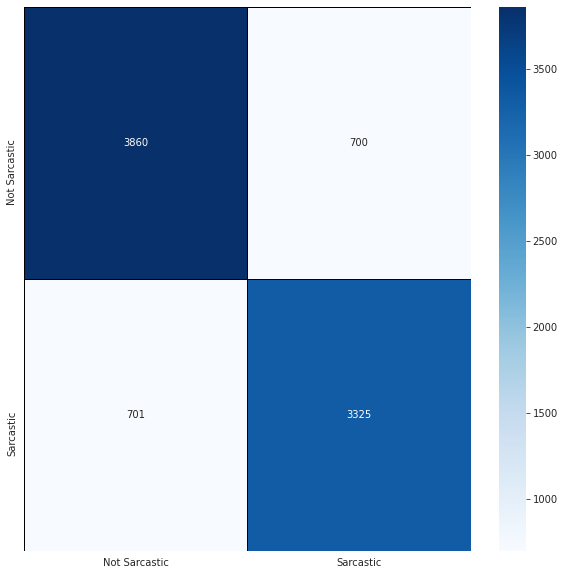

In [175]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])
#The diagonals of the confusion matrix improved. Our model jumped from 61% to 83%.

**Fin**